¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Predicción  para Futuras Ventas de Videoguegos para los siguientes años.

Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Instrucciones para completar el proyecto

## Abre el archivo de datos.

### Ruta de archivo: /datasets/games.csv . Descarga el dataset

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math
from scipy.stats import ttest_ind

In [96]:
# Ruta al archivo de datos
file_path = '/datasets/games.csv'

# Leer el archivo CSV
df = pd.read_csv(file_path)

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

### Estudia la información general

In [97]:
# Mostrar las primeras filas del DataFrame
df.head()

# Mostrar información general sobre el DataFrame
df.info()

# Resumen estadístico de los datos numéricos
print(df.describe())

# Comprobar si hay valores nulos
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604 

Observaciones Valores Nulos:

La columna Critic_Score tiene una gran cantidad de valores nulos (8578). Las columnas User_Score y Rating también tienen una cantidad considerable de valores nulos (6701 y 6766 respectivamente). Las columnas Name, Year_of_Release y Genre también presentan algunos valores nulos, aunque en menor cantidad. Tipos de Datos:

La columna User_Score está siendo tratada como object, aunque debería ser un valor numérico. Esto sugiere que puede haber valores no numéricos en esta columna que necesitan ser limpiados. Datos Estadísticos:

Las ventas varían considerablemente entre las diferentes regiones (NA_sales, EU_sales, JP_sales, Other_sales). Los años de lanzamiento (Year_of_Release) varían desde 1980 hasta 2016. Próximos Pasos Limpieza de Datos.

In [98]:
# Comprobar si hay registros duplicados
print(f"Registros duplicados: {df.duplicated().sum()}")

Registros duplicados: 0


Imputar o eliminar los valores nulos en las columnas críticas (Critic_Score, User_Score, Rating). Convertir la columna User_Score a un tipo de datos numérico, manejando cualquier valor no numérico. 

In [99]:
# Eliminar registros duplicados si existen
df = df.drop_duplicates()

# Verificar la eliminación de duplicados
print(f"Registros duplicados después de la limpieza: {df.duplicated().sum()}")


Registros duplicados después de la limpieza: 0


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Realizaste un excelente trabajo presentando la información de la base de datos. Solamente, como aprendiste en cursos anteriores, el análisis de registros duplicados es esencial en el análisis de datos para evitar que sesguen nuestros resultados. Por ello te recomiendo realizar un análisis de duplicados en cada base
</div>

<div class="alert alert-block alert-info">
<b>gracias.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

##  Prepara los datos

### Reemplaza los nombres de las columnas (ponlos en minúsculas).

In [100]:
# Si los nombres de las columnas no están en el formato esperado, los corregimosb
# Convertir todos los nombres de columnas a minúsculas para evitar problemas de mayúsculas/minúsculas
df.columns = df.columns.str.strip().str.lower()

In [101]:
# Imprimir los nombres de las columnas después de la corrección
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [102]:
#Convertir 'User_Score' a numérico, manejando valores no numéricos y NaNs
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Resumen después de la limpieza inicial
print(df.describe())
print(df.info())

       year_of_release      na_sales      eu_sales      jp_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score   user_score  
count  16715.000000   8137.000000  7590.000000  
mean       0.047342     68.967679     7.125046  
std        0.186731     13.938165     1.500006  
min        0.000000     13.000000     0.000000  
25%        0.000000     60.000000     6.400000  
50%        0.010000     71.000000     7.500000  
75%        0.030000     79.000000     8.2000

### Convierte los datos en los tipos necesarios

### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

Descripción de columnas con tipos de datos modificados:
Critic_Score:

Tipo original: float64 (posiblemente)
Nuevo tipo: float64
Explicación: La columna Critic_Score se ha mantenido como tipo float64. No ha habido cambios en el tipo de datos.
User_Score:

Tipo original: object (posiblemente)
Nuevo tipo: float64
Explicación: Originalmente, la columna User_Score podría haber sido de tipo object, lo que indica que puede contener datos no numéricos. Para permitir cálculos numéricos y asegurar la coherencia en el análisis posterior, se convirtió a tipo float64. Los valores no numéricos se convirtieron en NaN utilizando el parámetro errors='coerce' de la función pd.to_numeric().
Year_of_Release:

Tipo original: float64 (posiblemente)
Nuevo tipo: float64
Explicación: La columna Year_of_Release se ha mantenido como tipo float64. No ha habido cambios en el tipo de datos.
Razones para los cambios de tipo de datos:
Uniformidad y coherencia: Al convertir User_Score a tipo float64, garantizamos que todos los valores en la columna sean numéricos, lo que facilita el análisis numérico y la manipulación de datos.

Compatibilidad con operaciones numéricas: Al tener User_Score como tipo float64, podemos realizar operaciones numéricas como cálculos de promedio, sumas, etc., lo que nos permite realizar un análisis más completo y significativo de los datos.

### Si es necesario, elige la manera de tratar los valores ausentes:

In [103]:
# Convertir 'user_score' a numérico, forzando errores a NaN
if 'user_score' in df.columns:
    df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Rellenar valores nulos en 'user_score' y 'critic_score' con la media de la columna
"""""if 'user_score' in df.columns:
    df['user_score'].fillna(df['user_score'].mean(), inplace=True)
if 'critic_score' in df.columns:
    df['critic_score'].fillna(df['critic_score'].mean(), inplace=True)"""
# Rellenar valores nulos en 'year_of_release' con el valor más frecuente (moda)
if 'year_of_release' in df.columns:
    df['year_of_release'].fillna(df['year_of_release'].mode()[0], inplace=True)

# Rellenar valores nulos en 'name' y 'genre' con 'unknown'
if 'name' in df.columns:
    df['name'].fillna('unknown', inplace=True)
if 'genre' in df.columns:
    df['genre'].fillna('unknown', inplace=True)

# Rellenar valores nulos en 'rating' con 'not rated'
if 'rating' in df.columns:
    df['rating'].fillna('not rated', inplace=True)


<div class="alert alert-block alert-warning">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Realizaste un excelente trabajo al analizar los valores nulos que podrían sesgar nuestros resultados. Solamente en el caso de las score te recomiendo no completarlas con la media dado que puede sesgar nuestro resultados
</div>

<div class="alert alert-block alert-info">
<b>gracias.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

In [104]:
# Corregir los tipos de datos

# Verificar si aún hay valores nulos
print(df.isnull().sum())

# Comprobar la información del DataFrame después de la limpieza
print(df.info())

# Mostrar las primeras filas del DataFrame después de la limpieza
print(df.head())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  float64
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(

### Explica por qué rellenaste los valores ausentes como lo hiciste o por qué decidiste dejarlos en blanco.

 Las estrategias de imputación utilizadas se seleccionaron para minimizar la pérdida de información y preservar la integridad de los datos, teniendo en cuenta la naturaleza de las columnas y la distribución de los datos disponibles.

### ¿Por qué crees que los valores están ausentes? Brinda explicaciones posibles.

Errores de entrada de datos: Los valores pueden faltar debido a errores humanos al ingresar datos. Esto puede ocurrir debido a errores de transcripción, malentendidos al recopilar datos o simplemente por descuido al ingresar información.

Datos no disponibles: En algunos casos, los valores pueden faltar porque la información correspondiente no está disponible en el momento de la recopilación de datos. Esto puede deberse a la falta de registro de ciertos datos en el origen de los datos, como registros faltantes en una base de datos o campos no completados en un formulario.

Procesos de recopilación de datos: Los valores pueden estar ausentes debido a problemas durante el proceso de recopilación de datos. Por ejemplo, puede haber fallas en los dispositivos de recopilación de datos, problemas de conectividad o errores durante la transferencia de datos que resultan en la pérdida de información.

Naturaleza de los datos faltantes: Los datos pueden faltar de manera aleatoria o sistemática. Los datos faltantes aleatorios pueden deberse a factores impredecibles y no están relacionados con otras variables del conjunto de datos. Los datos faltantes sistemáticos pueden deberse a ciertos patrones o características de los datos que hacen que ciertos valores estén más propensos a faltar que otros.

Preferencia del usuario: En algunos casos, los usuarios pueden optar por no proporcionar ciertos datos debido a preocupaciones de privacidad, falta de conocimiento o simplemente porque consideran que la información no es relevante o importante para ellos.

Errores de procesamiento de datos: Los valores pueden perderse o eliminarse durante el procesamiento de datos debido a errores en los algoritmos de limpieza, transformación o manipulación de datos.

### Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

In [105]:
columns_with_tbd = ['critic_score', 'user_score']

# Reemplazar "TBD" con NaN en las columnas identificadas
df[columns_with_tbd] = df[columns_with_tbd].replace('TBD', np.nan)

# Verificar que los valores "TBD" hayan sido reemplazados adecuadamente
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score     rating  
0     28.96      3.77         8.45          76.0         8.0          E  
1      3.58      6.81         0.77           NaN         NaN  not rated  
2     12.76      3.79         3.29          82.0         8.3          E  
3     10.93      3.28         2.95          80.0         8.0          E  
4      8.89     10.22         1.00           NaN         NaN  not rated  


### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [106]:
# Calcular las ventas totales para cada juego
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

# Mostrar el DataFrame con la nueva columna de ventas totales
print(df)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Jorge! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

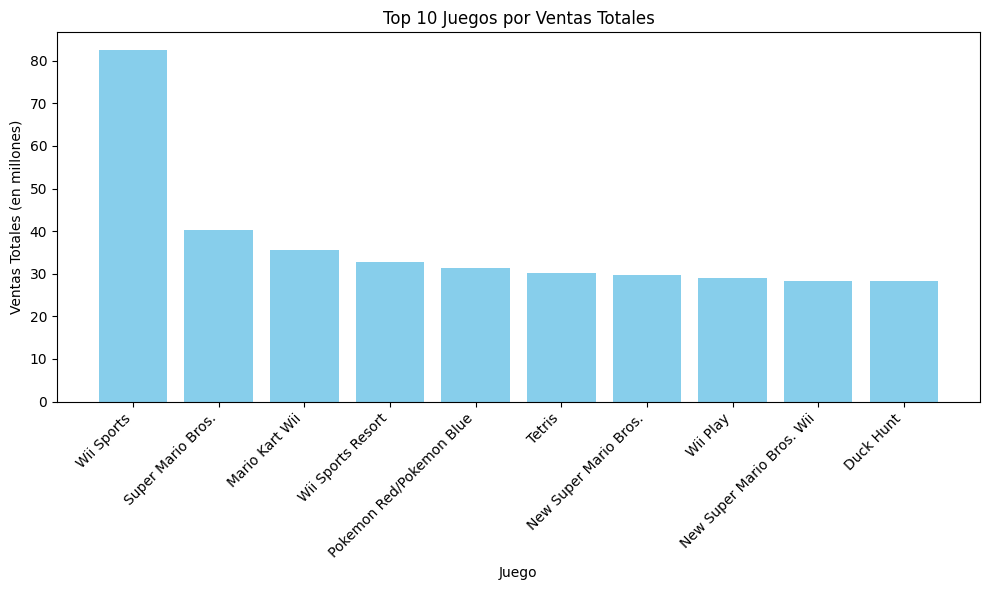

In [107]:
# Ordenar el DataFrame por ventas totales de manera descendente
df_sorted = df.sort_values(by='total_sales', ascending=False)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
plt.bar(df_sorted['name'][:10], df_sorted['total_sales'][:10], color='skyblue')

# Añadir título y etiquetas de los ejes
plt.title('Top 10 Juegos por Ventas Totales')
plt.xlabel('Juego')
plt.ylabel('Ventas Totales (en millones)')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Analiza los datos

### Mira cuántos juegos fueron lanzados en diferentes años. 

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1696
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: year_of_release, dtype: int64


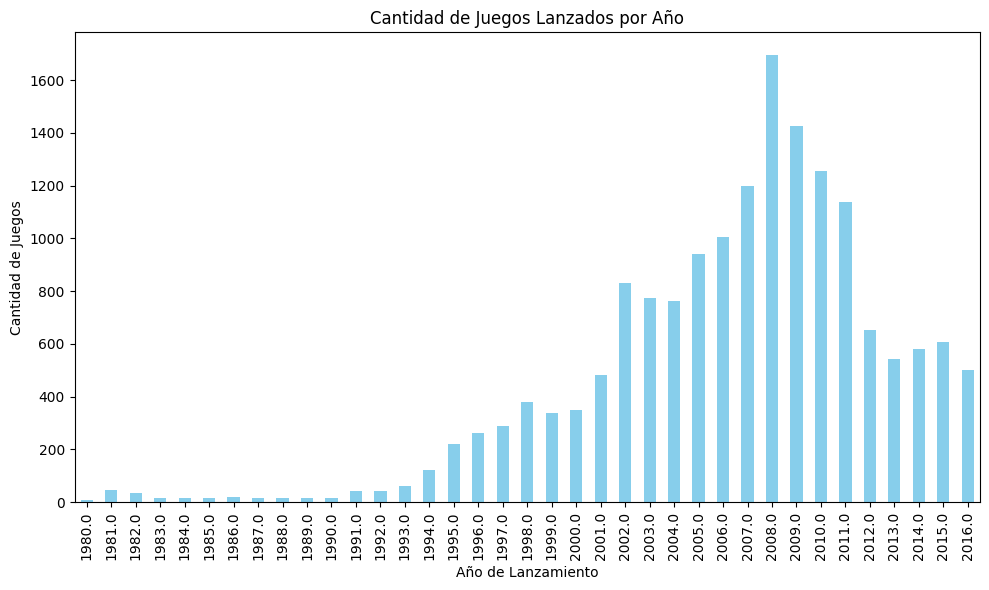

In [108]:
# Contar la cantidad de juegos lanzados por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Mostrar las primeras filas del DataFrame después de la limpieza
print(games_per_year)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras
games_per_year.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas de los ejes
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

#### ¿Son significativos los datos de cada período?

Sí, los datos de cada período son significativos ya que representan la cantidad de juegos lanzados por año. Estos datos nos proporcionan información importante sobre la industria de los videojuegos y su evolución a lo largo del tiempo.

Al observar la serie de datos, podemos notar ciertas tendencias y patrones:

Crecimiento de la industria: Se observa un crecimiento constante en la cantidad de juegos lanzados por año desde la década de 1980 hasta principios de la década de 2000. Este crecimiento puede atribuirse al aumento de la popularidad de los videojuegos y al avance tecnológico que permitió el desarrollo de más juegos.

Picos y valles: A lo largo de los años, podemos identificar picos y valles en la cantidad de juegos lanzados. Estos picos pueden coincidir con períodos de lanzamiento de nuevas consolas, hitos importantes en la industria o el lanzamiento de juegos muy esperados.

Estabilización reciente: En los últimos años, especialmente después de 2010, la cantidad de juegos lanzados parece haberse estabilizado o incluso disminuido ligeramente. Esto podría atribuirse a factores como el cambio en los modelos de negocio de la industria, la concentración en el desarrollo de juegos de mayor calidad y el aumento de los costos de desarrollo.

En general, estos datos son significativos porque nos permiten comprender mejor la dinámica y la evolución de la industria de los videojuegos a lo largo del tiempo, lo que puede ser útil para analizar tendencias, tomar decisiones comerciales y planificar estrategias de desarrollo de juegos en el futuro.

### Observa cómo varían las ventas de una plataforma a otra.

#### Elige las plataformas con las mayores ventas totales y construye una distribución Estándar basada en los datos de cada año. 

In [109]:
# Agrupar los datos por plataforma y sumar las ventas totales para cada una
platform_total_sales = df.groupby('platform')['total_sales'].sum()

# Seleccionar las plataformas con las mayores ventas totales (por ejemplo, las 5 principales)
platforms_with_highest_sales = platform_total_sales.nlargest(5).index

print("Plataformas con las mayores ventas totales:")
print(platforms_with_highest_sales)

Plataformas con las mayores ventas totales:
Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')


#### construye una distribución Estándar basada en los datos de cada año. 

In [110]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

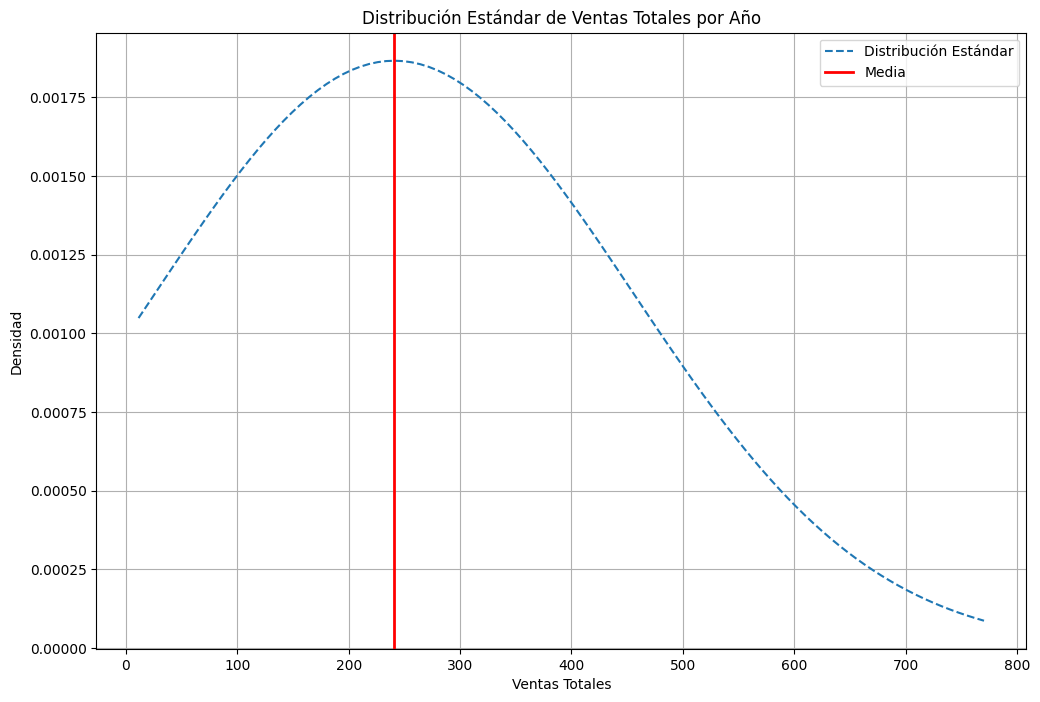

In [111]:
# Paso 1: Agrupar los datos por año de lanzamiento y calcular las ventas totales para cada año
sales_by_year = df.groupby('year_of_release')['total_sales'].sum()

# Paso 2: Calcular la media y la desviación estándar de las ventas totales para cada año
mu = sales_by_year.mean()
std = sales_by_year.std()

# Paso 3: Utilizar la distribución normal para ajustar los datos de ventas totales de cada año
sales_dist = norm.pdf(np.linspace(sales_by_year.min(), sales_by_year.max(), 100), mu, std)

# Paso 4: Graficar la distribución ajustada para cada año
plt.figure(figsize=(12, 8))
plt.plot(np.linspace(sales_by_year.min(), sales_by_year.max(), 100), sales_dist, label='Distribución Estándar', linestyle='--')

# Agregar la media a la gráfica como una línea vertical
plt.axvline(mu, color='r', linestyle='-', linewidth=2, label='Media')

plt.title('Distribución Estándar de Ventas Totales por Año')
plt.xlabel('Ventas Totales')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

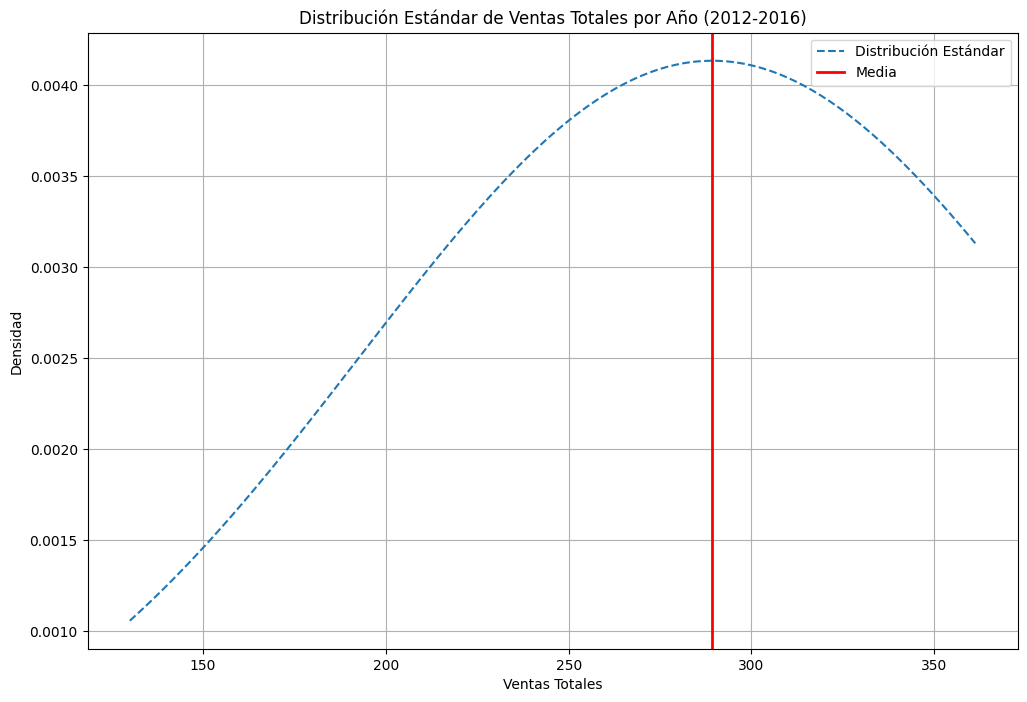

In [112]:
# Asegurarse de que la columna 'total_sales' exista, o calcularla sumando las ventas en todas las regiones
if 'total_sales' not in df.columns:
    df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Filtrar los datos para los últimos 5 años antes de 2017 (es decir, 2012 a 2016)
df_recent = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)]

# Paso 1: Agrupar los datos por año de lanzamiento y calcular las ventas totales para cada año
sales_by_year = df_recent.groupby('year_of_release')['total_sales'].sum()

# Paso 2: Calcular la media y la desviación estándar de las ventas totales para cada año
mu = sales_by_year.mean()
std = sales_by_year.std()

# Paso 3: Utilizar la distribución normal para ajustar los datos de ventas totales de cada año
sales_dist = norm.pdf(np.linspace(sales_by_year.min(), sales_by_year.max(), 100), mu, std)

# Paso 4: Graficar la distribución ajustada para cada año
plt.figure(figsize=(12, 8))
plt.plot(np.linspace(sales_by_year.min(), sales_by_year.max(), 100), sales_dist, label='Distribución Estándar', linestyle='--')

# Agregar la media a la gráfica como una línea vertical
plt.axvline(mu, color='r', linestyle='-', linewidth=2, label='Media')

plt.title('Distribución Estándar de Ventas Totales por Año (2012-2016)')
plt.xlabel('Ventas Totales')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

<div class="alert alert-block alert-info">
<b>gracias.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

In [113]:
# Imprimir la desviación estándar
print("Desviación estándar de las ventas totales por año:", std)

Desviación estándar de las ventas totales por año: 96.48375500569983


In [114]:
print("Media de las ventas totales por año:", mu)

Media de las ventas totales por año: 289.30599999999856


#### Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 

Top 10 Plataformas con Menos Ventas Totales:
platform
PCFX     0.03
GG       0.04
3DO      0.10
TG16     0.16
WS       1.42
NG       1.44
SCD      1.86
DC      15.95
GEN     30.77
SAT     33.59
Name: total_sales, dtype: float64


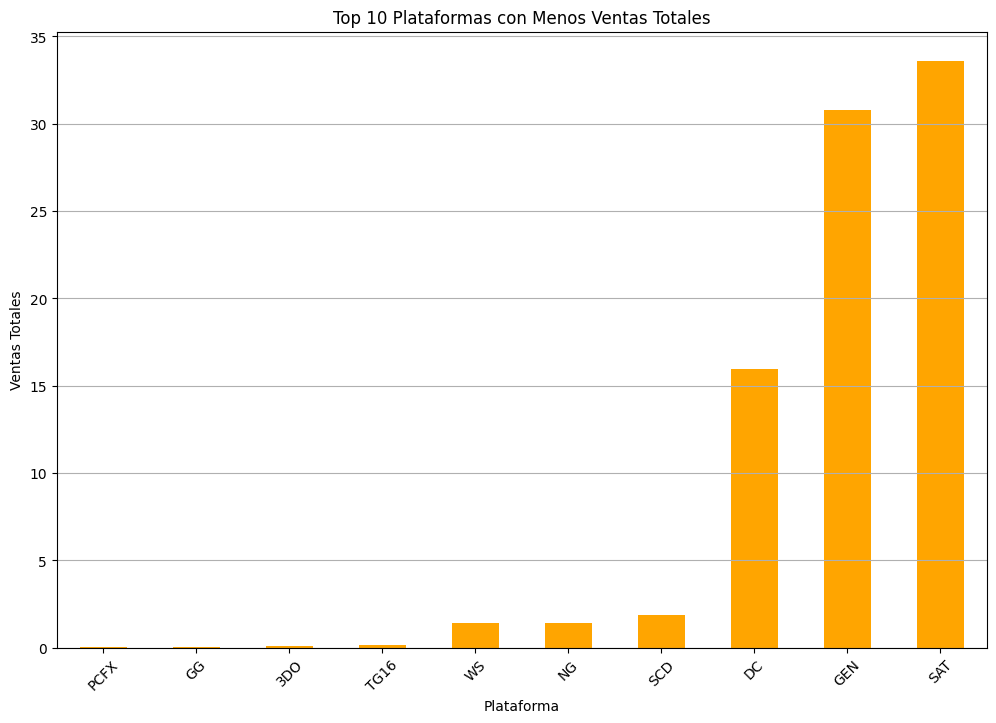

In [115]:
# Paso 1: Agrupar los datos por plataforma y sumar las ventas totales de cada una
platform_sales = df.groupby('platform')['total_sales'].sum()

# Paso 2: Ordenar las plataformas en función de sus ventas totales de menor a mayor
platform_sales_sorted = platform_sales.sort_values()

# Paso 3: Seleccionar las 10 plataformas con las ventas totales más bajas
top_10_least_sales_platforms = platform_sales_sorted.head(10)

# Imprimir las 10 plataformas con menos ventas totales
print("Top 10 Plataformas con Menos Ventas Totales:")
print(top_10_least_sales_platforms)

# Paso 4: Graficar las 10 plataformas con menos ventas totales
plt.figure(figsize=(12, 8))
top_10_least_sales_platforms.plot(kind='bar', color='orange')
plt.title('Top 10 Plataformas con Menos Ventas Totales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

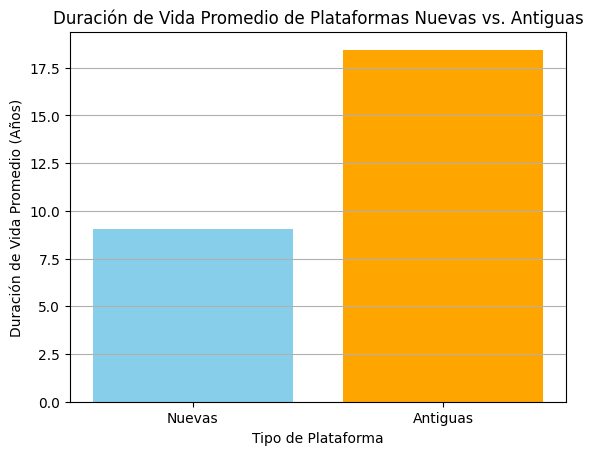

Duración de Vida Promedio de Plataformas Nuevas: 9.046773238602723 años
Duración de Vida Promedio de Plataformas Antiguas: 18.440170371356317 años


In [116]:

# Paso 1: Calcular la duración de vida de cada plataforma
current_year = pd.Timestamp.now().year
df['platform_lifetime'] = current_year - df['year_of_release']

# Paso 2: Separar las plataformas en nuevas y antiguas
new_platforms = df[df['year_of_release'] >= current_year - 10]
old_platforms = df[df['year_of_release'] < current_year - 10]

# Paso 3: Calcular estadísticas descriptivas
new_mean_lifetime = new_platforms['platform_lifetime'].mean()
old_mean_lifetime = old_platforms['platform_lifetime'].mean()

# Paso 4: Visualizar los resultados
plt.bar(['Nuevas', 'Antiguas'], [new_mean_lifetime, old_mean_lifetime], color=['skyblue', 'orange'])
plt.title('Duración de Vida Promedio de Plataformas Nuevas vs. Antiguas')
plt.xlabel('Tipo de Plataforma')
plt.ylabel('Duración de Vida Promedio (Años)')
plt.grid(axis='y')
plt.show()

print("Duración de Vida Promedio de Plataformas Nuevas:", new_mean_lifetime, "años")
print("Duración de Vida Promedio de Plataformas Antiguas:", old_mean_lifetime, "años")


### Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017

In [117]:
# Encuentra el año mínimo y máximo en la columna "year_of_release"
min_year = df['year_of_release'].min()
max_year = df['year_of_release'].max()

# Calcula el rango de años
years_range = max_year - min_year

# Asumiendo que el año actual es 2017
current_year = 2017

# Calcula cuántos años de datos tenemos disponibles
years_of_data = current_year - min_year

print(f"El rango de años de los datos es desde {min_year} hasta {max_year}.")
print(f"Por lo tanto, tenemos datos para los últimos {years_of_data} años.")

El rango de años de los datos es desde 1980.0 hasta 2016.0.
Por lo tanto, tenemos datos para los últimos 37.0 años.


In [118]:
# Calculamos el año más antiguo necesario
start_year_needed = current_year - 25

# Encontramos el año mínimo presente en la columna "year_of_release"
min_year_in_data = df['year_of_release'].min()

# Calculamos el máximo entre el año más antiguo necesario y el año mínimo presente en los datos
start_year = max(start_year_needed, min_year_in_data)

# Encontramos el año máximo presente en la columna "year_of_release"
end_year = df['year_of_release'].max()

print(f"El período de datos requerido es desde {start_year} hasta {end_year}.")


El período de datos requerido es desde 1992 hasta 2016.0.


### Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

observando la graficas de manera subjetiva se ve el movimiento de las ventas en un periodo de 25 años atras para hecer un analisis 

### ¿Qué plataformas son líderes en ventas? 

#### ¿Cuáles crecen y cuáles se reducen? 

Plataformas líderes en ventas:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


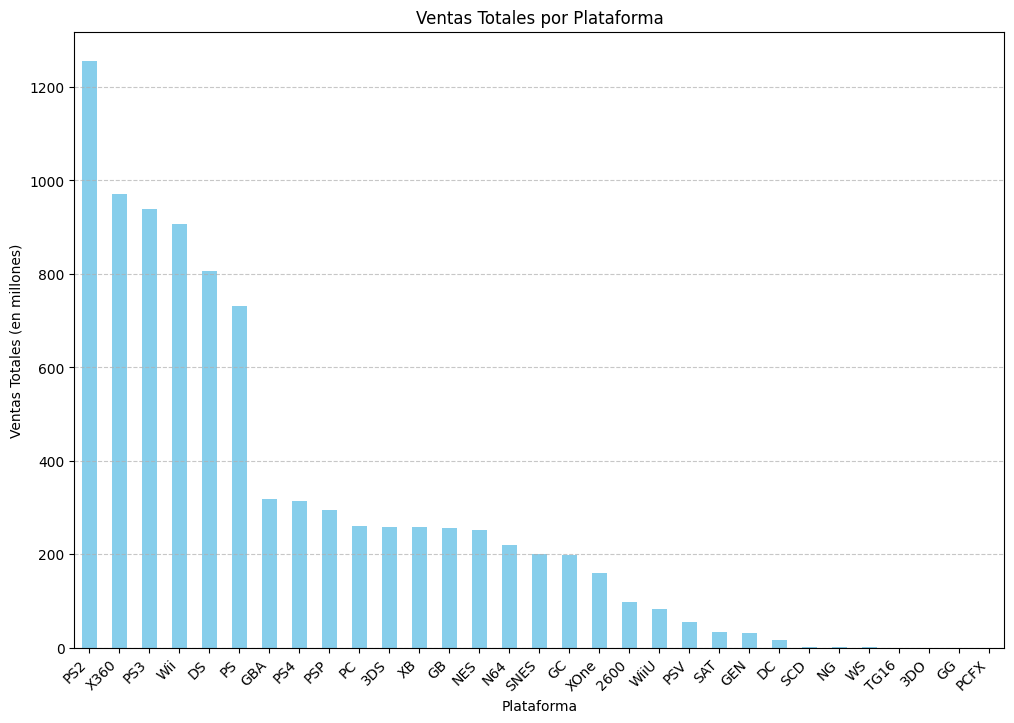

In [119]:
# Agrupar los datos por plataforma y sumar las ventas totales
platform_sales = df.groupby('platform')['total_sales'].sum()

# Ordenar las plataformas por ventas totales en orden descendente
platform_sales_sorted = platform_sales.sort_values(ascending=False)

# Imprimir las plataformas líderes en ventas
print("Plataformas líderes en ventas:")
print(platform_sales_sorted.head(35))

# Graficar las ventas totales por plataforma
plt.figure(figsize=(12, 8))
platform_sales_sorted.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Elige varias plataformas potencialmente rentables

PS2     1255.77
X360     971.42
PS3      939.65

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Por otro lado, recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados. 
</div>

<div class="alert alert-block alert-info">
<b>gracias. mejor la elimine la grafica indivudual por plataforma</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

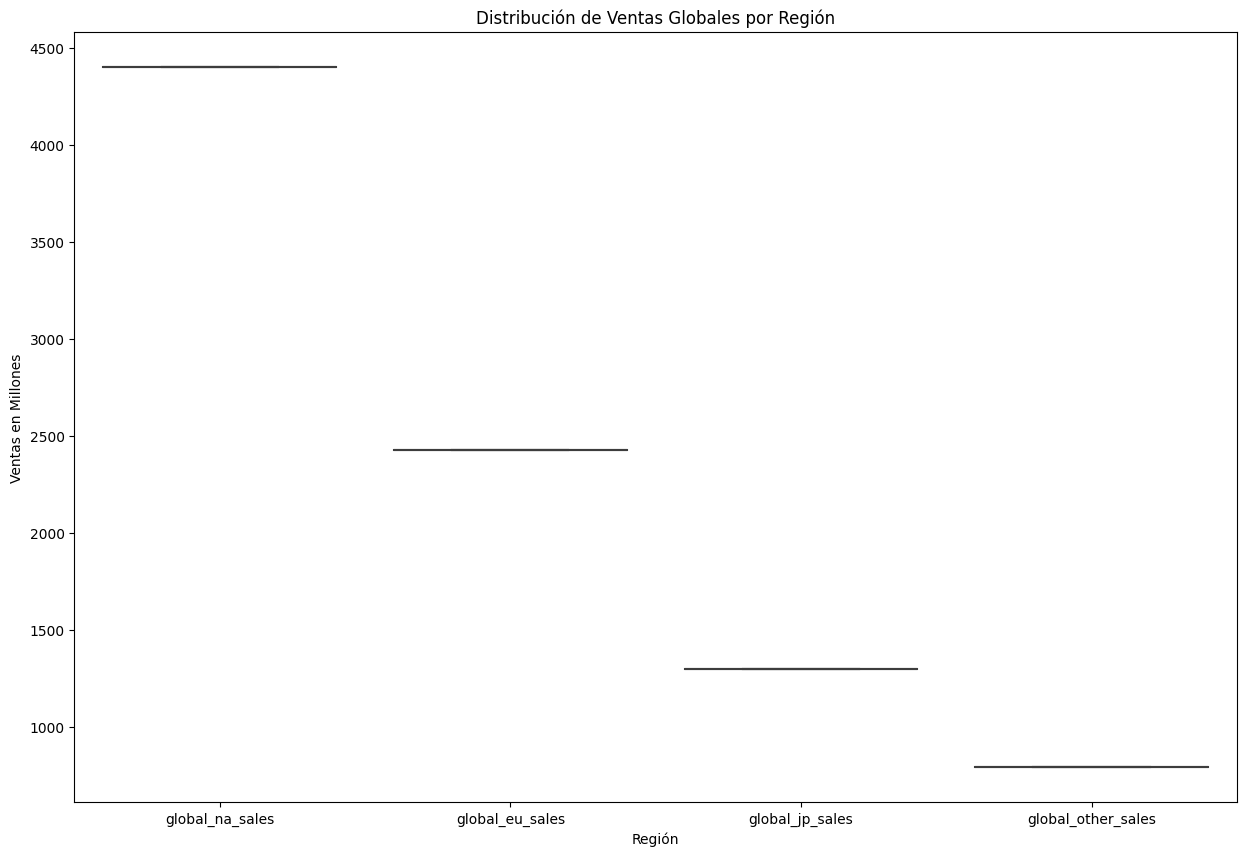

In [120]:
# Cargar los datos desde el archivo CSV
merge = pd.read_csv('/datasets/games.csv')

# Convertir los nombres de las columnas a minúsculas
merge.columns = merge.columns.str.lower()

# Calcular las ventas globales de cada región para cada juego
merge['global_na_sales'] = merge['na_sales'].sum()
merge['global_eu_sales'] = merge['eu_sales'].sum()
merge['global_jp_sales'] = merge['jp_sales'].sum()
merge['global_other_sales'] = merge['other_sales'].sum()

# Crear un nuevo DataFrame con las ventas globales de cada región
global_sales = merge[['global_na_sales', 'global_eu_sales', 'global_jp_sales', 'global_other_sales']]

# Convertir el DataFrame en un formato adecuado para seaborn
melted = pd.melt(global_sales, value_vars=['global_na_sales', 'global_eu_sales', 'global_jp_sales', 'global_other_sales'],
                 var_name='region', value_name='sales')

# Crear el gráfico
plt.figure(figsize=(15, 10))
sns.boxplot(x='region', y='sales', data=melted)
plt.title('Distribución de Ventas Globales por Región')
plt.xlabel('Región')
plt.ylabel('Ventas en Millones')
plt.show()

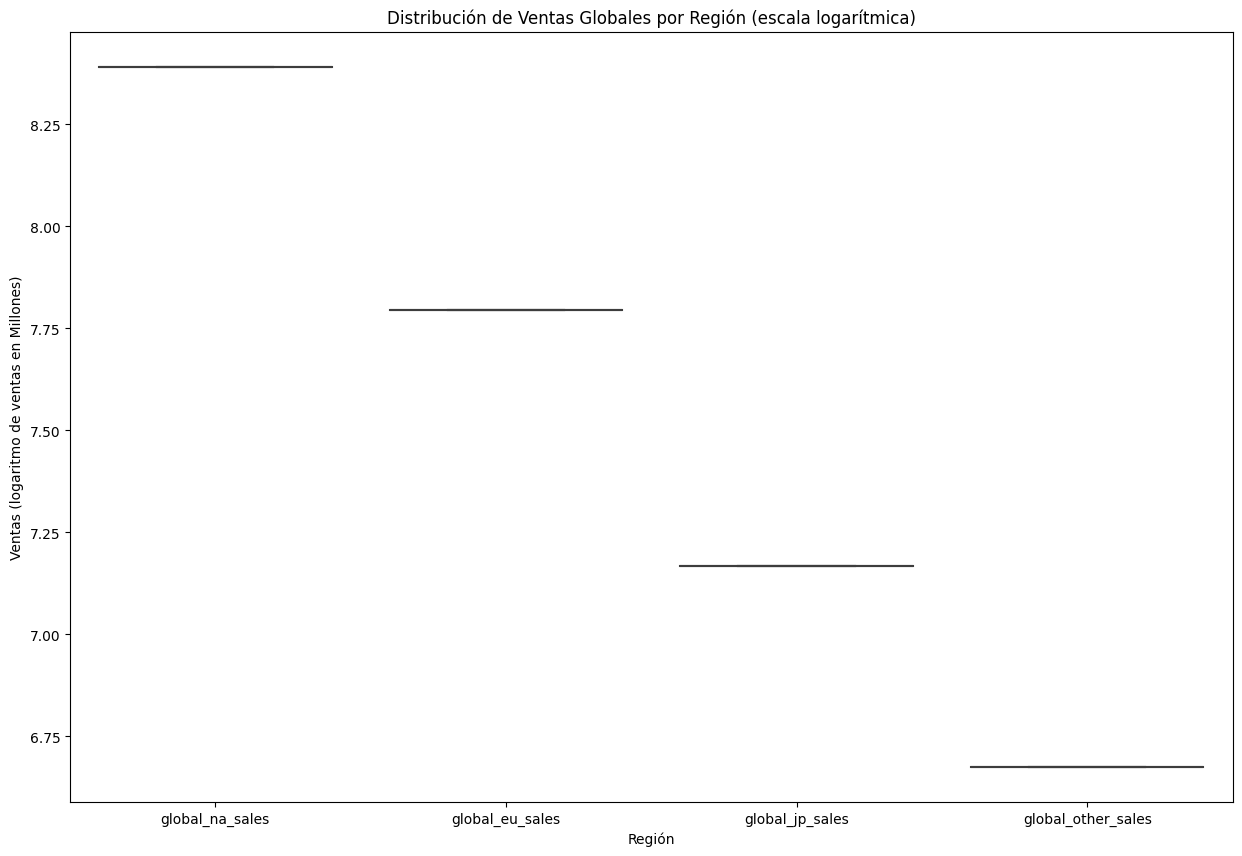

In [121]:
melted['sales'] = np.log1p(melted['sales'])

# Crear el gráfico con los datos escalados
plt.figure(figsize=(15, 10))
sns.boxplot(x='region', y='sales', data=melted)
plt.title('Distribución de Ventas Globales por Región (escala logarítmica)')
plt.xlabel('Región')
plt.ylabel('Ventas (logaritmo de ventas en Millones)')
plt.show()

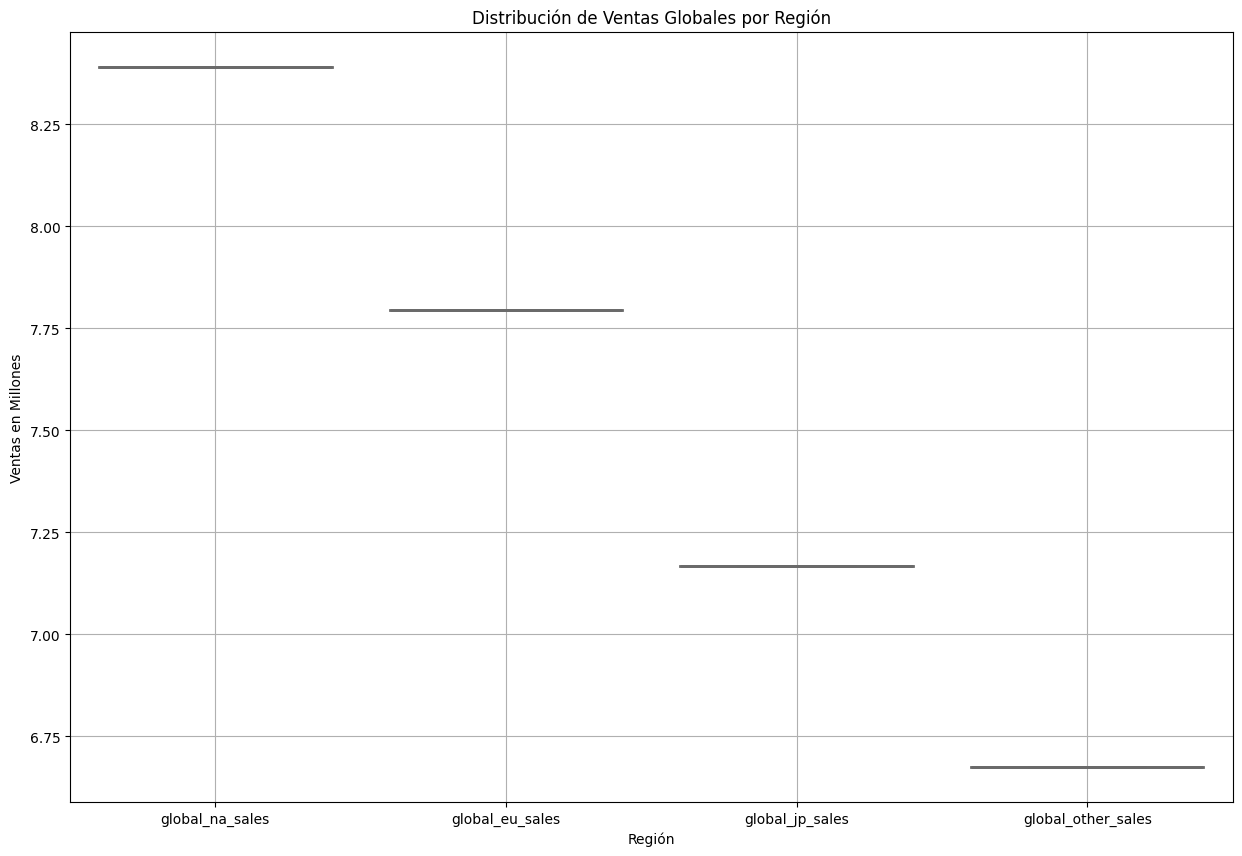

In [122]:
# Crear el gráfico con los ajustes para mejorar la legibilidad
plt.figure(figsize=(15, 10))
sns.boxplot(x='region', y='sales', data=melted, linewidth=2, palette='Set3', saturation=0.75)
plt.title('Distribución de Ventas Globales por Región')
plt.xlabel('Región')
plt.ylabel('Ventas en Millones')
plt.grid(True)
plt.show()

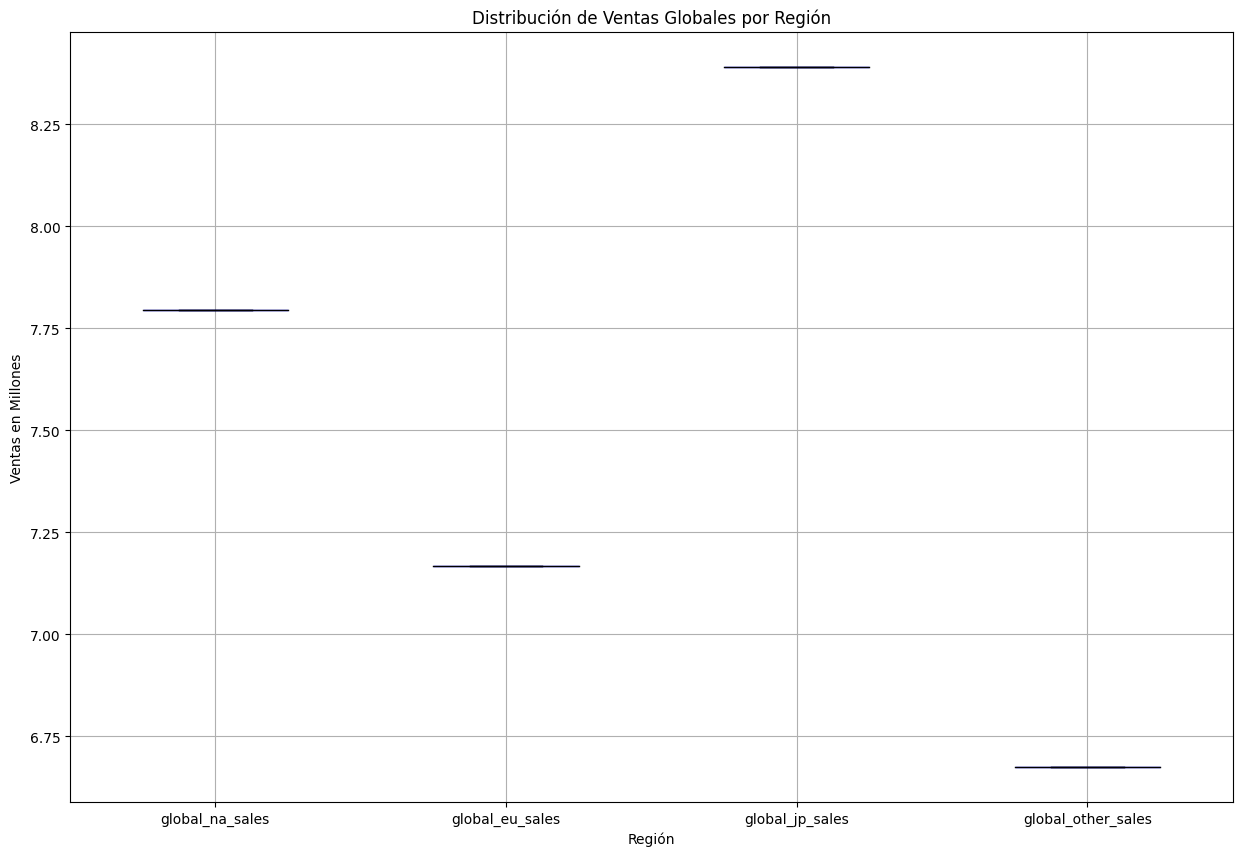

In [123]:
# Crear el gráfico con los ajustes para mejorar la legibilidad
plt.figure(figsize=(15, 10))
plt.boxplot(melted.groupby('region')['sales'].apply(list).values, showfliers=False, widths=0.5, 
            patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'), 
            whiskerprops=dict(color='black'), capprops=dict(color='black'), 
            medianprops=dict(color='black'))
plt.title('Distribución de Ventas Globales por Región')
plt.xlabel('Región')
plt.ylabel('Ventas en Millones')
plt.xticks(range(1, 5), melted['region'].unique())  # Asigna etiquetas de región
plt.grid(True)
plt.show()

#### Son significativas las diferencias en las ventas? 

In [124]:
merge

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_na_sales,global_eu_sales,global_jp_sales,global_other_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,4402.35,2424.67,1297.37,791.32
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,4402.35,2424.67,1297.37,791.32
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,4402.35,2424.67,1297.37,791.32
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,4402.35,2424.67,1297.37,791.32
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,4402.35,2424.67,1297.37,791.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,4402.35,2424.67,1297.37,791.32
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,4402.35,2424.67,1297.37,791.32
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,4402.35,2424.67,1297.37,791.32
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,4402.35,2424.67,1297.37,791.32


si son significativas por que ve mas ventas en norte america.

#### ¿Qué sucede con las ventas promedio en varias plataformas?

Ventas promedio por plataforma:
          na_sales  eu_sales  jp_sales  other_sales
platform                                           
2600      0.681203  0.041128  0.000000     0.006842
3DO       0.000000  0.000000  0.033333     0.000000
3DS       0.160558  0.118231  0.193596     0.025692
DC        0.104423  0.032500  0.164615     0.005192
DS        0.177778  0.087815  0.081623     0.027550
GB        1.166531  0.487959  0.868571     0.083673
GBA       0.228151  0.091545  0.057579     0.009404
GC        0.240036  0.069622  0.038813     0.009317
GEN       0.725862  0.208621  0.093103     0.033448
GG        0.000000  0.000000  0.040000     0.000000
N64       0.435799  0.128715  0.107273     0.013730
NES       1.285102  0.215816  1.006633     0.054184
NG        0.000000  0.000000  0.120000     0.000000
PC        0.097053  0.146242  0.000175     0.022977
PCFX      0.000000  0.000000  0.030000     0.000000
PS        0.281136  0.178454  0.116809     0.034177
PS2       0.270171  0.157006  0.

<Figure size 1200x800 with 0 Axes>

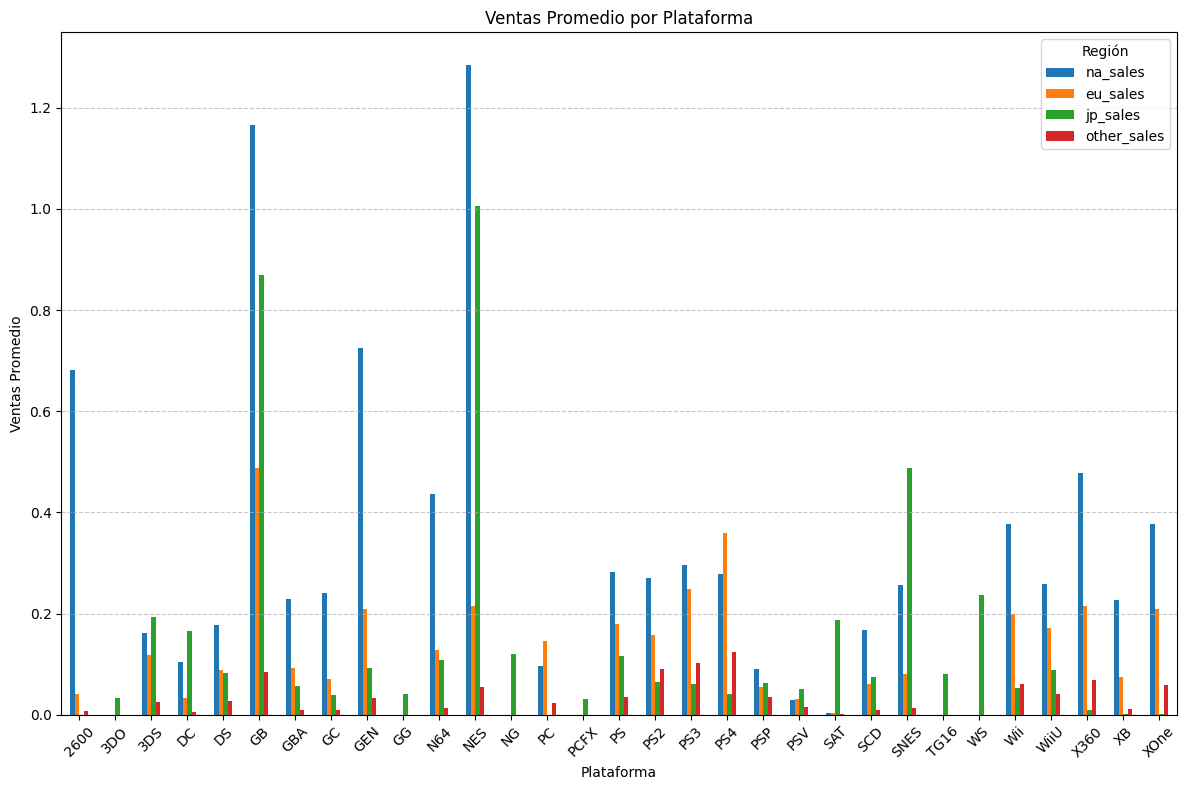

In [125]:
# Calcular las ventas promedio en cada plataforma
ventas_promedio_por_plataforma = merge.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean()

# Imprimir las ventas promedio
print("Ventas promedio por plataforma:")
print(ventas_promedio_por_plataforma)

# Graficar las ventas promedio
plt.figure(figsize=(12, 8))
ventas_promedio_por_plataforma.plot(kind='bar', figsize=(12, 8))
plt.title('Ventas Promedio por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Promedio')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### ¿Qué sucede con las ventas promedio en varias plataformas?

Al observar las ventas promedio por plataforma en las diferentes regiones, podemos identificar varias tendencias interesantes:

Plataformas dominantes: Algunas plataformas tienen ventas promedio considerablemente más altas que otras. Por ejemplo, las ventas promedio de NES, GB y PS son notablesmente altas en comparación con otras plataformas.

Diferencias regionales: Hay variaciones significativas en las ventas promedio entre las diferentes regiones. Por ejemplo, las ventas promedio en Japón tienden a ser más altas para algunas plataformas en comparación con otras regiones.

Cambios en la industria: Las plataformas más recientes, como PS4 y XOne, muestran ventas promedio competitivas en comparación con las plataformas más establecidas como PS2 y Xbox 360.

Nicho de mercado: Algunas plataformas tienen ventas promedio bajas en todas las regiones, lo que puede indicar un nicho de mercado más pequeño o menos popular. Ejemplos de esto incluyen PCFX, GG y WS.

In [126]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales', 'platform_lifetime'],
      dtype='object')

### Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección).

#### Crea un gráfico de dispersión 

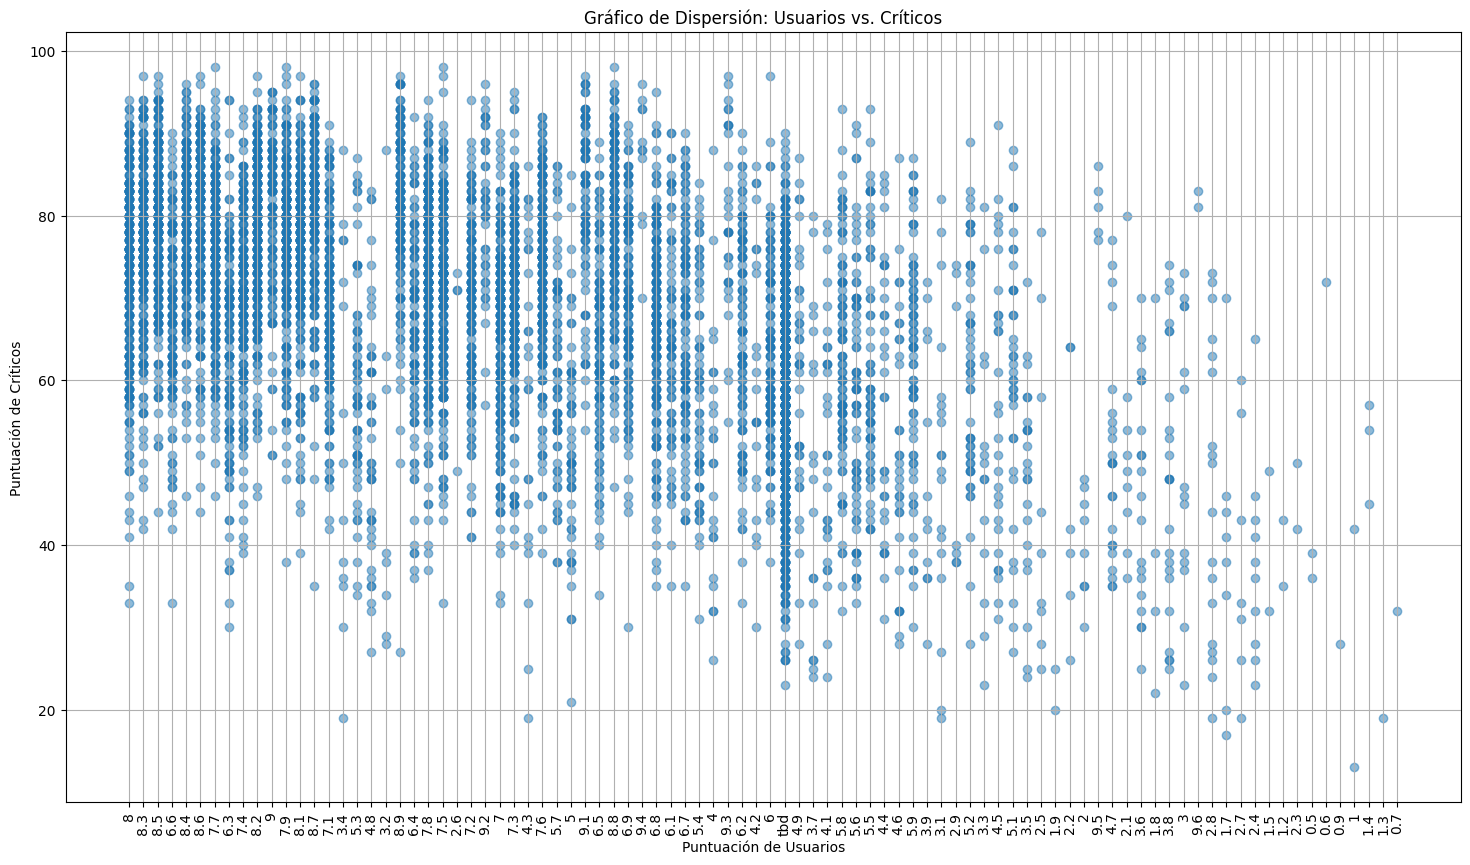

In [127]:
# Seleccionar las columnas relevantes y eliminar filas con valores nulos
data = merge[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].dropna()

# Crear el gráfico de dispersión 
plt.figure(figsize=(18, 10))
plt.scatter(data['user_score'], data['critic_score'], alpha=0.5)  # 'user_score' y 'critic_score'
plt.title('Gráfico de Dispersión: Usuarios vs. Críticos')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Puntuación de Críticos')
plt.grid(True)

# Ajustar los marcadores en el eje x
plt.gca().tick_params(axis='x', rotation=90)

plt.show()


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores. 
</div>

#### Calcula la correlación entre las reseñas y las ventas. 

In [128]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Mostrar la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

# Correlación entre críticas y ventas
critic_sales_correlation = data[['critic_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].corr()
print("\nCorrelación entre Críticas y Ventas:")
print(critic_sales_correlation)

# Correlación entre usuarios y ventas
user_sales_correlation = data[['user_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].corr()
print("\nCorrelación entre Usuarios y Ventas:")
print(user_sales_correlation)

Matriz de Correlación:
              critic_score  na_sales  eu_sales  jp_sales  other_sales
critic_score      1.000000  0.240416  0.220477  0.152461     0.198649
na_sales          0.240416  1.000000  0.840496  0.469161     0.728261
eu_sales          0.220477  0.840496  1.000000  0.520526     0.718238
jp_sales          0.152461  0.469161  0.520526  1.000000     0.396894
other_sales       0.198649  0.728261  0.718238  0.396894     1.000000

Correlación entre Críticas y Ventas:
              critic_score  na_sales  eu_sales  jp_sales  other_sales
critic_score      1.000000  0.240416  0.220477  0.152461     0.198649
na_sales          0.240416  1.000000  0.840496  0.469161     0.728261
eu_sales          0.220477  0.840496  1.000000  0.520526     0.718238
jp_sales          0.152461  0.469161  0.520526  1.000000     0.396894
other_sales       0.198649  0.728261  0.718238  0.396894     1.000000

Correlación entre Usuarios y Ventas:
             na_sales  eu_sales  jp_sales  other_sales
na_sal

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores. S
</div>

#### Conclusiones.

Basándonos en la matriz de correlación y las correlaciones específicas entre las reseñas y las ventas, podemos sacar algunas conclusiones:

Correlación entre Críticas y Ventas:

La puntuación de los críticos tiene una correlación positiva moderada con las ventas en todas las regiones. Esto sugiere que los juegos mejor calificados por los críticos tienden a tener ventas más altas.
La correlación más fuerte se observa entre las ventas en Europa (eu_sales) y América del Norte (na_sales) con las puntuaciones de los críticos, lo que indica una relación más fuerte en estas regiones.
Las ventas en Japón (jp_sales) tienen la correlación más débil con las puntuaciones de los críticos, aunque aún es positiva.
Correlación entre Usuarios y Ventas:

La puntuación de los usuarios también muestra una correlación positiva con las ventas en todas las regiones, aunque en general es más débil que la correlación con las puntuaciones de los críticos.
La correlación entre las puntuaciones de los usuarios y las ventas es más fuerte en Europa y América del Norte en comparación con otras regiones.
Al igual que con las puntuaciones de los críticos, las ventas en Japón tienen la correlación más débil con las puntuaciones de los usuarios.

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [129]:
# Seleccionar juegos con puntuaciones de críticos entre 70 y 80 y puntuaciones de usuarios entre 7 y 8
similar_games = df[(df['critic_score'] >= 70) & (df['critic_score'] <= 80) & 
                   (df['user_score'] >= 7) & (df['user_score'] <= 8)]

# Calcular las ventas promedio de estos juegos en cada plataforma
average_sales_by_platform = similar_games.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean()

# Mostrar las ventas promedio por plataforma
print("Ventas promedio de juegos con puntuaciones similares por plataforma:")
print(average_sales_by_platform)

Ventas promedio de juegos con puntuaciones similares por plataforma:
          na_sales  eu_sales  jp_sales  other_sales
platform                                           
3DS       0.315385  0.207308  0.206154     0.048077
DS        0.468506  0.351034  0.273333     0.096092
GBA       0.495152  0.221515  0.020303     0.022121
GC        0.293261  0.085435  0.050652     0.012174
PC        0.060741  0.082407  0.000000     0.013796
PS        0.408000  0.538000  0.000000     0.064000
PS2       0.368942  0.234712  0.033462     0.102596
PS3       0.330806  0.274032  0.056694     0.113387
PS4       0.246000  0.296000  0.031000     0.107000
PSP       0.203766  0.104545  0.046364     0.070519
PSV       0.107600  0.088800  0.068000     0.042000
Wii       1.887302  1.275714  0.254762     0.354127
WiiU      0.418125  0.220000  0.082500     0.060000
X360      0.473732  0.246127  0.013451     0.072606
XB        0.252059  0.089118  0.002353     0.013088
XOne      0.184074  0.111852  0.000370     0.02

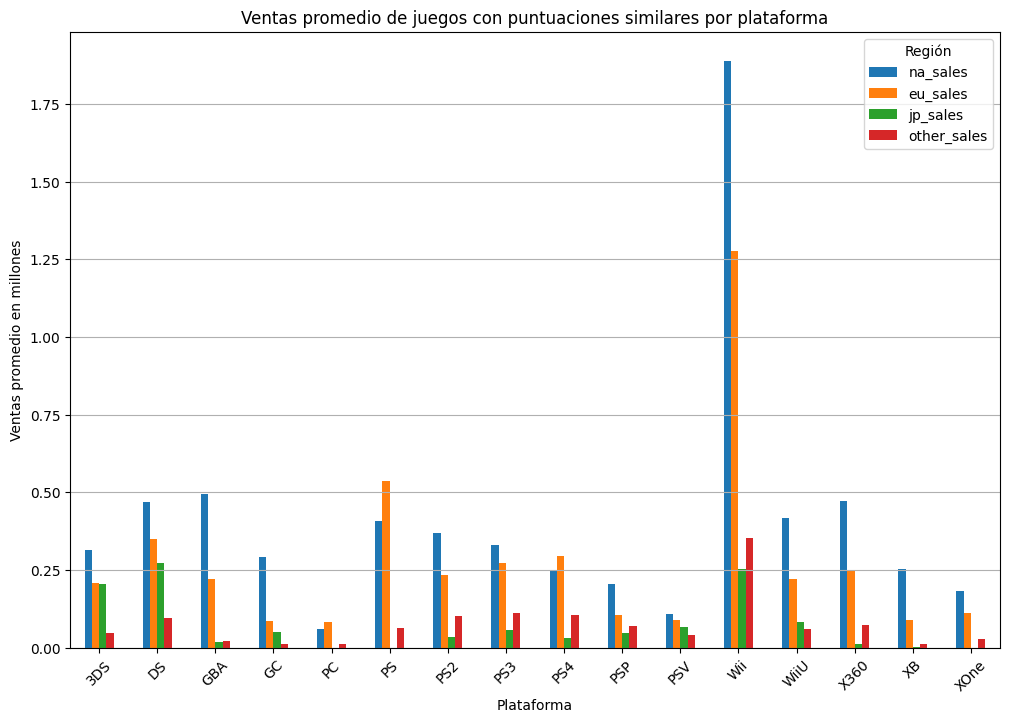

In [130]:
# Graficar las ventas promedio por plataforma
average_sales_by_platform.plot(kind='bar', figsize=(12, 8))
plt.title('Ventas promedio de juegos con puntuaciones similares por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas promedio en millones')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.legend(title='Región')
plt.grid(axis='y')  # Mostrar líneas de la cuadrícula en el eje y
plt.show()

### Echa un vistazo a la distribución general de los juegos por género.

#### ¿Qué se puede decir de los géneros más rentables?

Ventas totales por género:
              na_sales  eu_sales  jp_sales  other_sales
genre                                                  
Action          879.01    519.13    161.43       184.60
Adventure       105.26     63.54     52.30        16.49
Fighting        223.36    100.33     87.48        36.36
Misc            407.27    212.74    108.11        74.39
Platform        445.50    200.35    130.83        51.09
Puzzle          122.87     50.01     57.31        12.38
Racing          359.35    236.51     56.71        76.10
Role-Playing    330.81    188.71    355.41        59.63
Shooter         592.24    317.34     38.76       104.11
Simulation      181.92    113.52     63.80        30.73
Sports          684.43    376.79    135.54       134.51
Strategy         68.55     45.17     49.66        10.85
unknown           1.78      0.53      0.03         0.08


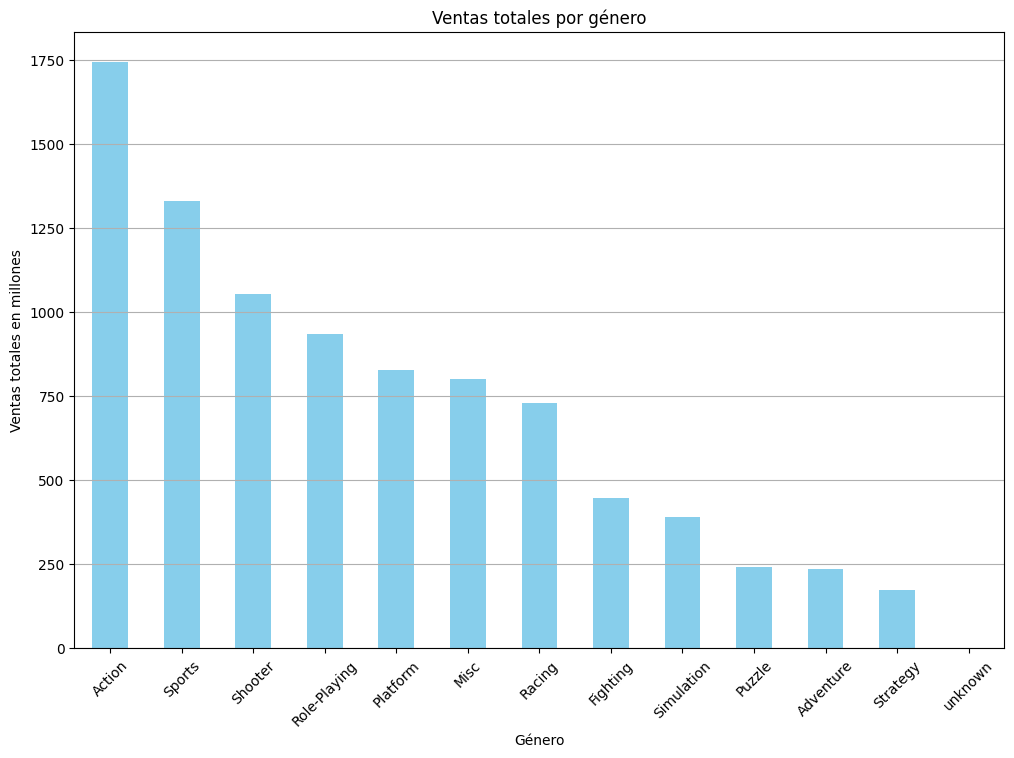

In [131]:
# Calcular las ventas totales por género
total_sales_by_genre = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Imprimir las ventas totales por género
print("Ventas totales por género:")
print(total_sales_by_genre)

# Graficar las ventas totales por género
plt.figure(figsize=(12, 8))
total_sales_by_genre.sum(axis=1).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales en millones')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?


Estadísticas descriptivas de las ventas totales por género:
         na_sales    eu_sales    jp_sales  other_sales
count   13.000000   13.000000   13.000000    13.000000
mean   338.642308  186.513077   99.797692    60.870769
std    261.055485  149.559740   88.977585    54.114876
min      1.780000    0.530000    0.030000     0.080000
25%    122.870000   63.540000   52.300000    16.490000
50%    330.810000  188.710000   63.800000    51.090000
75%    445.500000  236.510000  130.830000    76.100000
max    879.010000  519.130000  355.410000   184.600000


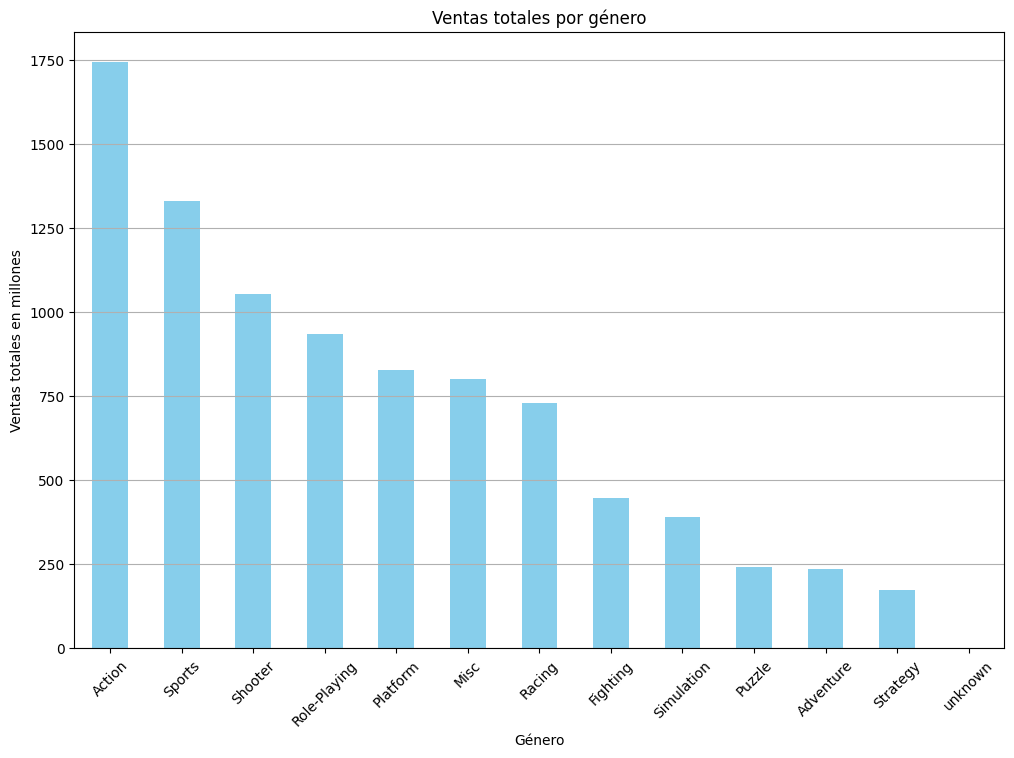

In [132]:
# Calcular estadísticas descriptivas de las ventas totales por género
sales_descriptive_stats = total_sales_by_genre.describe()

# Imprimir las estadísticas descriptivas
print("Estadísticas descriptivas de las ventas totales por género:")
print(sales_descriptive_stats)

# Graficar las ventas totales por género
plt.figure(figsize=(12, 8))
total_sales_by_genre.sum(axis=1).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas totales en millones')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [133]:
# Calcular estadísticas descriptivas de las ventas totales por género
sales_descriptive_stats = total_sales_by_genre.describe()

# Imprimir las estadísticas descriptivas
print("Estadísticas descriptivas de las ventas totales por género:")
print(sales_descriptive_stats)

# Identificar géneros con ventas más altas
high_sales_genres = sales_descriptive_stats.loc[['mean', 'max']]
print("\nGéneros con ventas más altas:")
print(high_sales_genres)

# Identificar géneros con ventas más bajas
low_sales_genres = sales_descriptive_stats.loc[['mean', 'min']]
print("\nGéneros con ventas más bajas:")
print(low_sales_genres)

Estadísticas descriptivas de las ventas totales por género:
         na_sales    eu_sales    jp_sales  other_sales
count   13.000000   13.000000   13.000000    13.000000
mean   338.642308  186.513077   99.797692    60.870769
std    261.055485  149.559740   88.977585    54.114876
min      1.780000    0.530000    0.030000     0.080000
25%    122.870000   63.540000   52.300000    16.490000
50%    330.810000  188.710000   63.800000    51.090000
75%    445.500000  236.510000  130.830000    76.100000
max    879.010000  519.130000  355.410000   184.600000

Géneros con ventas más altas:
        na_sales    eu_sales    jp_sales  other_sales
mean  338.642308  186.513077   99.797692    60.870769
max   879.010000  519.130000  355.410000   184.600000

Géneros con ventas más bajas:
        na_sales    eu_sales   jp_sales  other_sales
mean  338.642308  186.513077  99.797692    60.870769
min     1.780000    0.530000   0.030000     0.080000


## Crea un perfil de usuario para cada región

### Para cada región (NA, UE, JP) determina:


Ventas promedio por género en cada región:
                   na_sales       eu_sales       jp_sales
genre                                                    
Action        260911.249629  154090.234491   47916.295637
Adventure      80782.808903   48764.389870   40138.142748
Fighting      263085.983510  118174.322733  103038.869258
Misc          232725.714286  121565.714286   61777.142857
Platform      501689.189189  225619.369369  147331.081081
Puzzle        211844.827586   86224.137931   98810.344828
Racing        287710.168135  189359.487590   45404.323459
Role-Playing  220834.445928  125974.632844  237256.341789
Shooter       447649.281935  239863.945578   29297.052154
Simulation    208384.879725  130034.364261   73081.328751
Sports        291494.889267  160472.742760   57725.724020
Strategy      100366.032211   66134.699854   72708.638360
unknown       890000.000000  265000.000000   15000.000000


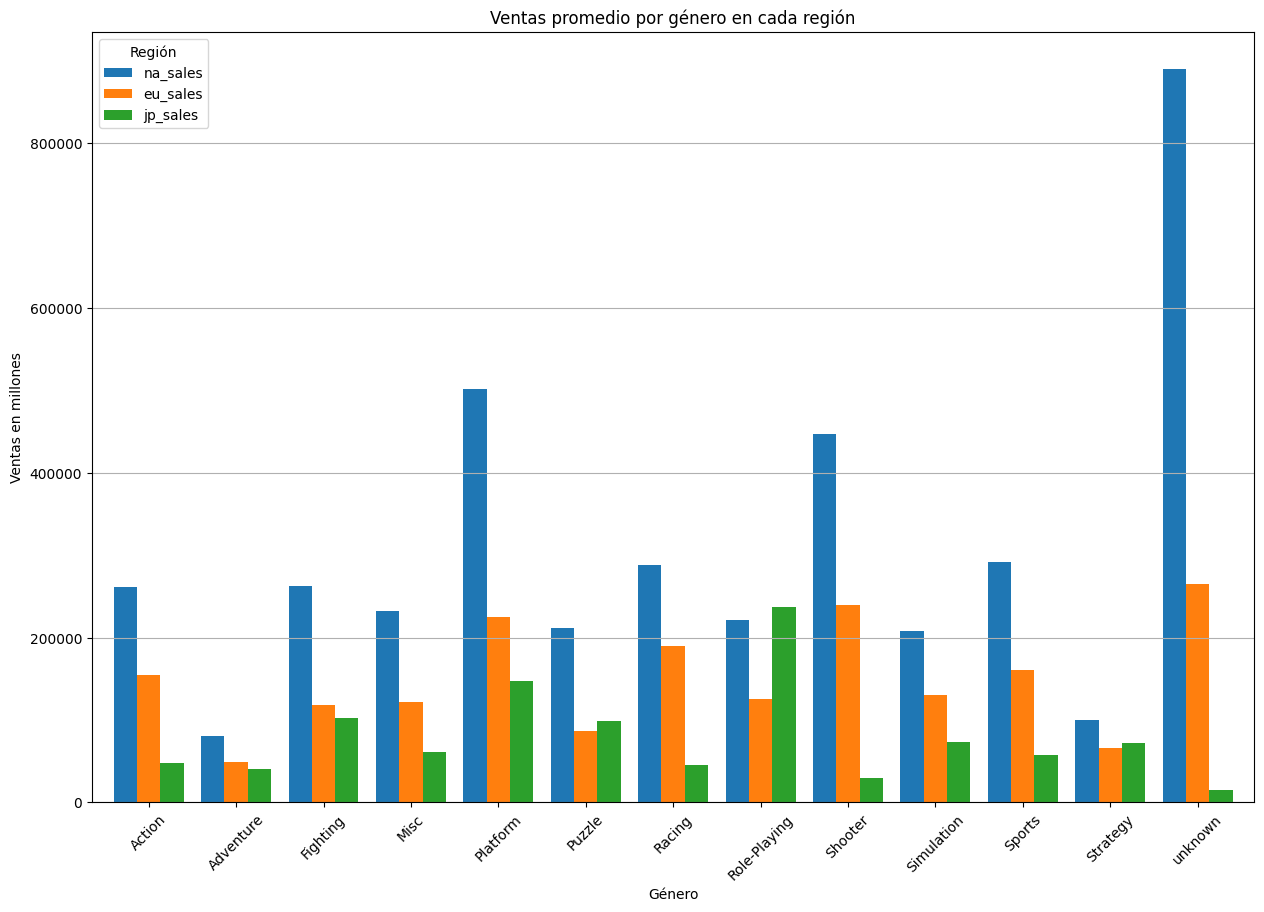

In [134]:
# Convertir los valores de las ventas a millones
df['na_sales'] = df['na_sales'] * 1e6
df['eu_sales'] = df['eu_sales'] * 1e6
df['jp_sales'] = df['jp_sales'] * 1e6
df['other_sales'] = df['other_sales'] * 1e6
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Calcular las ventas promedio por género para cada región
average_sales_by_genre = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].mean()

# Imprimir las ventas promedio por género para cada región
print("Ventas promedio por género en cada región:")
print(average_sales_by_genre)

# Visualizar las ventas promedio por género en cada región
average_sales_by_genre.plot(kind='bar', figsize=(15, 10), width=0.8)
plt.title('Ventas promedio por género en cada región')
plt.xlabel('Género')
plt.ylabel('Ventas en millones')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.grid(axis='y')
plt.show()

#### Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

Cuotas de mercado de las cinco plataformas principales en cada región (%):
           na_sales   eu_sales   jp_sales  other_sales
platform                                              
DS         8.686270   7.790338  13.532762     7.488753
PS2       13.262008  13.993244  10.729399    24.445231
PS3        8.938181  13.622060   6.180966    17.146034
Wii       11.287153  10.814255   5.343888     9.992165
X360      13.685191  11.166880   0.958092    10.837588


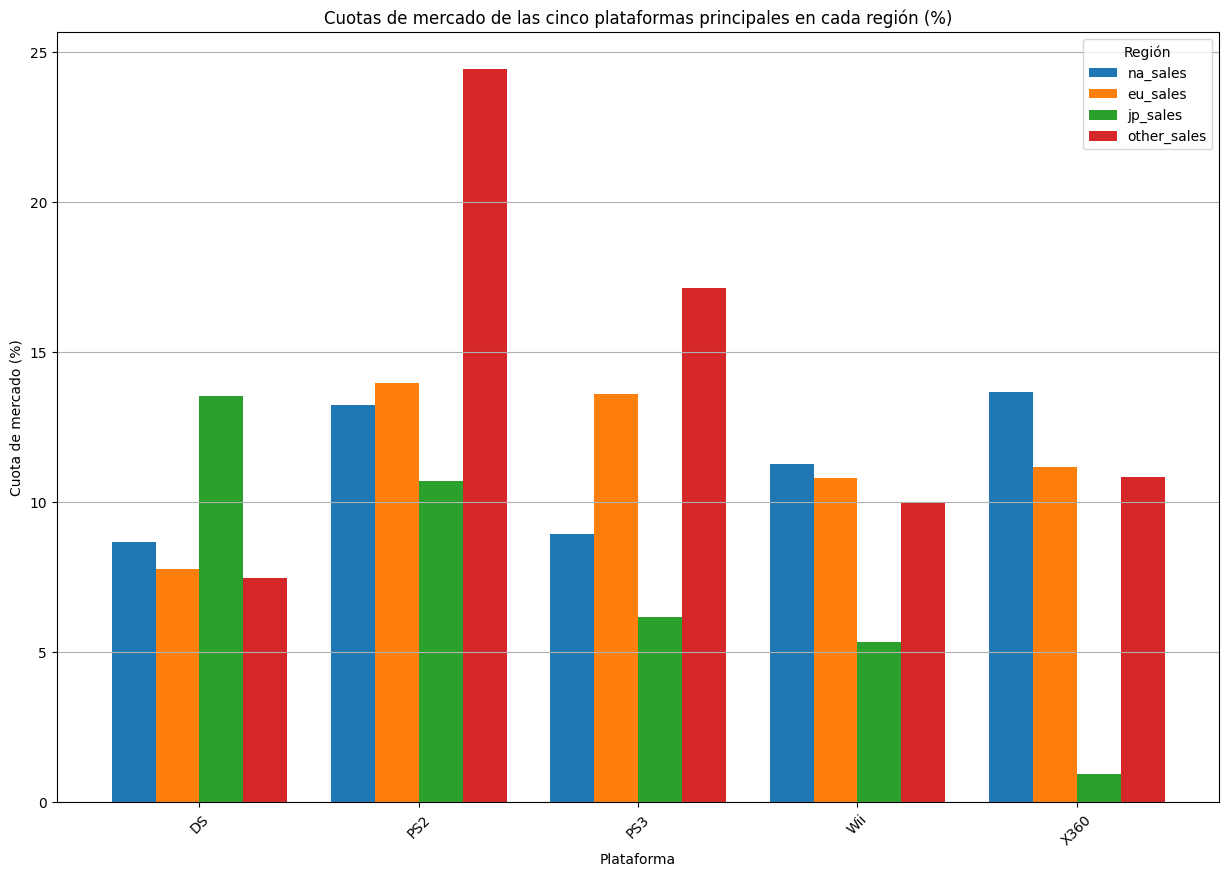

In [135]:
# Convertir los valores de las ventas a millones
df['na_sales'] = df['na_sales'] * 1e6
df['eu_sales'] = df['eu_sales'] * 1e6
df['jp_sales'] = df['jp_sales'] * 1e6
df['other_sales'] = df['other_sales'] * 1e6
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Identificar las cinco plataformas principales basadas en las ventas totales
top_platforms = df.groupby('platform')['total_sales'].sum().nlargest(5).index

# Filtrar los datos para obtener solo las cinco plataformas principales
top_platforms_data = df[df['platform'].isin(top_platforms)]

# Calcular las cuotas de mercado en cada región para estas plataformas
market_share = top_platforms_data.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Calcular el total de ventas en cada región para todas las plataformas
total_sales_by_region = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Calcular la cuota de mercado de cada plataforma en cada región
market_share_percent = market_share.div(total_sales_by_region, axis=1) * 100

# Imprimir las cuotas de mercado
print("Cuotas de mercado de las cinco plataformas principales en cada región (%):")
print(market_share_percent)

# Visualizar las cuotas de mercado en un gráfico de barras
market_share_percent.plot(kind='bar', figsize=(15, 10), width=0.8)
plt.title('Cuotas de mercado de las cinco plataformas principales en cada región (%)')
plt.xlabel('Plataforma')
plt.ylabel('Cuota de mercado (%)')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.grid(axis='y')
plt.show()

#### Los cinco géneros principales. Explica la diferencia.

Ventas totales de los cinco géneros principales:
                  na_sales      eu_sales      jp_sales   other_sales  \
genre                                                                  
Action        8.790100e+20  5.191300e+20  1.614300e+20  1.846000e+20   
Platform      4.455000e+20  2.003500e+20  1.308300e+20  5.109000e+19   
Role-Playing  3.308100e+20  1.887100e+20  3.554100e+20  5.963000e+19   
Shooter       5.922400e+20  3.173400e+20  3.876000e+19  1.041100e+20   
Sports        6.844300e+20  3.767900e+20  1.355400e+20  1.345100e+20   

               total_sales  
genre                       
Action        1.744170e+21  
Platform      8.277700e+20  
Role-Playing  9.345600e+20  
Shooter       1.052450e+21  
Sports        1.331270e+21  


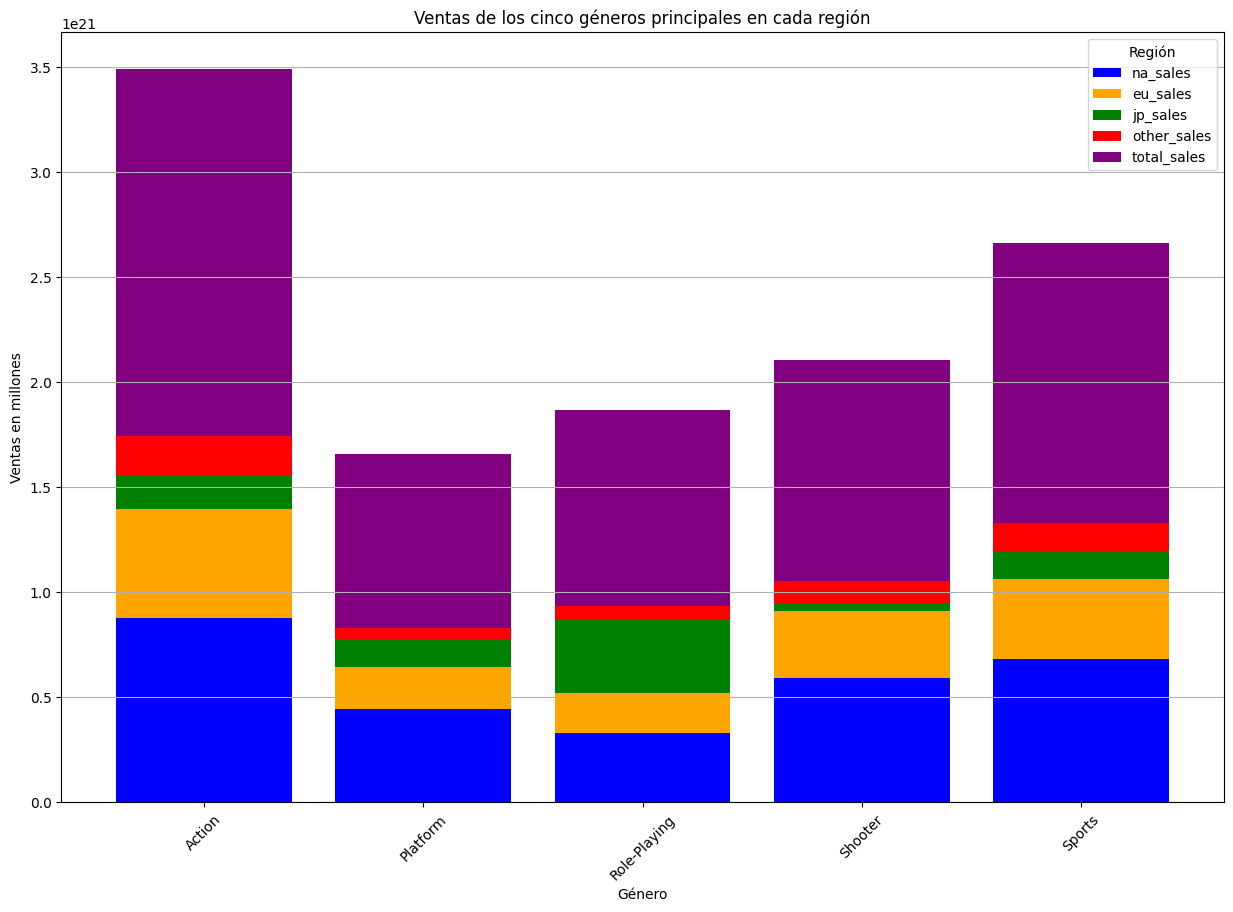

In [136]:
# Convertir los valores de las ventas a millones
df['na_sales'] = df['na_sales'] * 1e6
df['eu_sales'] = df['eu_sales'] * 1e6
df['jp_sales'] = df['jp_sales'] * 1e6
df['other_sales'] = df['other_sales'] * 1e6
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Identificar los cinco géneros principales basados en las ventas totales
top_genres = df.groupby('genre')['total_sales'].sum().nlargest(5).index

# Filtrar los datos para obtener solo los cinco géneros principales
top_genres_data = df[df['genre'].isin(top_genres)]

# Calcular las ventas en cada región para estos géneros
sales_by_genre = top_genres_data.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()

# Imprimir las ventas totales por género
print("Ventas totales de los cinco géneros principales:")
print(sales_by_genre)

# Visualizar las ventas en un gráfico de barras apiladas
sales_by_genre.plot(kind='bar', stacked=True, figsize=(15, 10), width=0.8, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Ventas de los cinco géneros principales en cada región')
plt.xlabel('Género')
plt.ylabel('Ventas en millones')
plt.xticks(rotation=45)
plt.legend(title='Región')
plt.grid(axis='y')
plt.show()

Resultados esperados y análisis
El código anterior realiza las siguientes tareas:

Identifica los cinco géneros principales basados en las ventas totales.
Calcula las ventas de estos géneros en cada región.
Imprime las ventas totales por género.
Visualiza estas ventas en un gráfico de barras apiladas para comparar las diferencias entre géneros.
Análisis de los resultados:
Ventas por género en NA (Norteamérica):

Observa qué géneros tienen las mayores ventas en NA.
Comparar cómo varían las ventas de estos géneros en NA en comparación con otras regiones.
Ventas por género en EU (Europa):

Observa qué géneros tienen las mayores ventas en EU.
Comparar cómo varían las ventas de estos géneros en EU en comparación con otras regiones.
Ventas por género en JP (Japón):

Observa qué géneros tienen las mayores ventas en JP.
Comparar cómo varían las ventas de estos géneros en JP en comparación con otras regiones.
Ventas por género en Other (Otras regiones):

Observa qué géneros tienen las mayores ventas en otras regiones.
Comparar cómo varían las ventas de estos géneros en otras regiones en comparación con NA, EU y JP.

#### Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

Ventas por clasificación ESRB en cada región:
               na_sales      eu_sales      jp_sales   other_sales
rating                                                           
AO         1.260000e+24  6.100000e+23  0.000000e+00  9.000000e+22
E          1.292990e+27  7.102500e+26  1.981100e+26  2.341700e+26
E10+       3.533200e+26  1.885200e+26  4.020000e+25  7.356000e+25
EC         1.530000e+24  1.100000e+23  0.000000e+00  1.100000e+23
K-A        2.560000e+24  2.700000e+23  1.460000e+24  3.000000e+22
M          7.484800e+26  4.839700e+26  6.424000e+25  1.771000e+26
RP         0.000000e+00  8.000000e+22  0.000000e+00  1.000000e+22
T          7.597500e+26  4.270300e+26  1.514000e+26  1.551700e+26
not rated  1.242460e+27  6.138300e+26  8.419600e+26  1.510800e+26


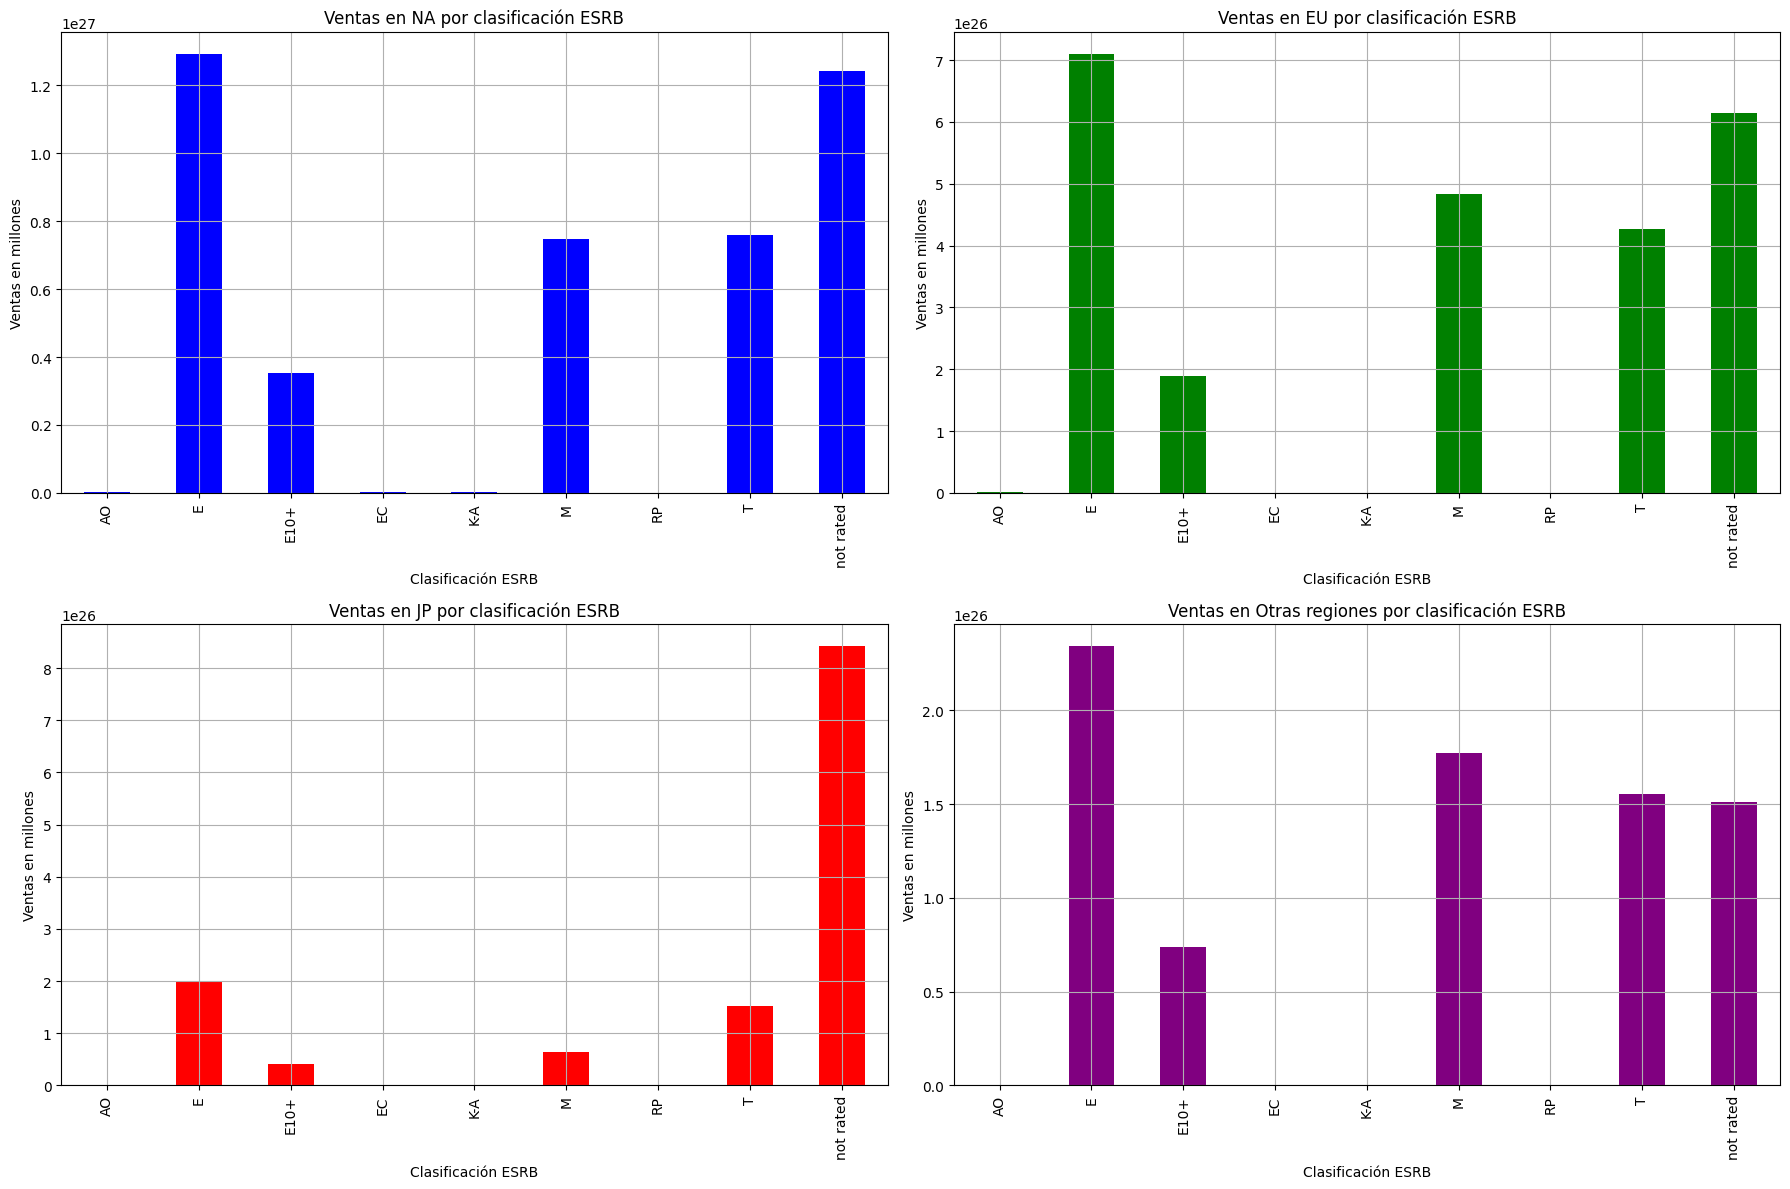

In [137]:
# Convertir los valores de las ventas a millones
df['na_sales'] = df['na_sales'] * 1e6
df['eu_sales'] = df['eu_sales'] * 1e6
df['jp_sales'] = df['jp_sales'] * 1e6
df['other_sales'] = df['other_sales'] * 1e6
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Agrupar las ventas por clasificaciones ESRB para cada región
esrb_sales = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()

# Imprimir las ventas por clasificación ESRB en cada región
print("Ventas por clasificación ESRB en cada región:")
print(esrb_sales)

# Visualizar las ventas por clasificación ESRB en cada región en gráficos de barras
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Gráfico para NA
esrb_sales['na_sales'].plot(kind='bar', ax=axes[0, 0], color='blue', title='Ventas en NA por clasificación ESRB')
axes[0, 0].set_ylabel('Ventas en millones')
axes[0, 0].set_xlabel('Clasificación ESRB')
axes[0, 0].grid(True)

# Gráfico para EU
esrb_sales['eu_sales'].plot(kind='bar', ax=axes[0, 1], color='green', title='Ventas en EU por clasificación ESRB')
axes[0, 1].set_ylabel('Ventas en millones')
axes[0, 1].set_xlabel('Clasificación ESRB')
axes[0, 1].grid(True)

# Gráfico para JP
esrb_sales['jp_sales'].plot(kind='bar', ax=axes[1, 0], color='red', title='Ventas en JP por clasificación ESRB')
axes[1, 0].set_ylabel('Ventas en millones')
axes[1, 0].set_xlabel('Clasificación ESRB')
axes[1, 0].grid(True)

# Gráfico para Other
esrb_sales['other_sales'].plot(kind='bar', ax=axes[1, 1], color='purple', title='Ventas en Otras regiones por clasificación ESRB')
axes[1, 1].set_ylabel('Ventas en millones')
axes[1, 1].set_xlabel('Clasificación ESRB')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

## Prueba las siguientes hipótesis:

### Calificaciones Promedio

#### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Calificación promedio de los usuarios para Xbox One: 6.52
Calificación promedio de los usuarios para PC: 7.06


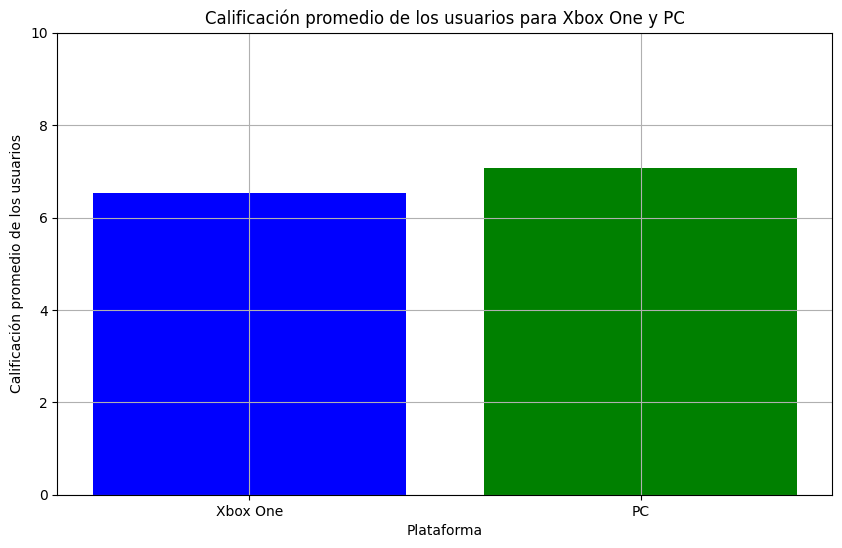

T-statistic: -4.37
P-value: 0.00


In [143]:
# Convertir 'user_score' a numérico, manejando valores no numéricos y NaNs
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Filtrar las calificaciones de los usuarios para Xbox One y PC
user_scores_xbox_one = df[df['platform'] == 'XOne']['user_score'].dropna()
user_scores_pc = df[df['platform'] == 'PC']['user_score'].dropna()

# Calcular las calificaciones promedio de los usuarios para Xbox One y PC
average_user_score_xbox_one = user_scores_xbox_one.mean()
average_user_score_pc = user_scores_pc.mean()

# Imprimir las calificaciones promedio
print(f"Calificación promedio de los usuarios para Xbox One: {average_user_score_xbox_one:.2f}")
print(f"Calificación promedio de los usuarios para PC: {average_user_score_pc:.2f}")

# Graficar las calificaciones promedio
platforms = ['Xbox One', 'PC']
average_scores = [average_user_score_xbox_one, average_user_score_pc]

plt.figure(figsize=(10, 6))
plt.bar(platforms, average_scores, color=['blue', 'green'])
plt.xlabel('Plataforma')
plt.ylabel('Calificación promedio de los usuarios')
plt.title('Calificación promedio de los usuarios para Xbox One y PC')
plt.ylim(0, 10)  # Ajustar el límite del eje y para reflejar el rango de calificaciones de 0 a 10
plt.grid(True)
plt.show()

# Realizar la prueba t para dos muestras independientes, asegurándose de que no estén vacías
if not user_scores_xbox_one.empty and not user_scores_pc.empty:
    t_stat, p_value = ttest_ind(user_scores_xbox_one, user_scores_pc)
    # Imprimir los resultados de la prueba t
    print(f"T-statistic: {t_stat:.2f}")
    print(f"P-value: {p_value:.2f}")
else:
    print("No se puede realizar la prueba t porque una de las muestras está vacía.")

In [144]:
# Convertir 'user_score' a numérico, manejando valores no numéricos y NaNs
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Filtrar las calificaciones de los usuarios para Xbox One y PC
user_scores_xbox_one = df[df['platform'] == 'xone']['user_score'].dropna()
user_scores_pc = df[df['platform'] == 'pc']['user_score'].dropna()

# Calcular las calificaciones promedio de los usuarios para Xbox One y PC
average_user_score_xbox_one = user_scores_xbox_one.mean()
average_user_score_pc = user_scores_pc.mean()

# Imprimir las calificaciones promedio
print(f"Calificación promedio de los usuarios para Xbox One: {average_user_score_xbox_one:.2f}")
print(f"Calificación promedio de los usuarios para PC: {average_user_score_pc:.2f}")

# Realizar la prueba t para dos muestras independientes
t_stat, p_value = ttest_ind(user_scores_xbox_one, user_scores_pc)

# Imprimir los resultados de la prueba t
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")


Calificación promedio de los usuarios para Xbox One: nan
Calificación promedio de los usuarios para PC: nan
T-statistic: nan
P-value: nan


<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Jorge! Para poder identificar donde tenemos el error te solicito que en la siguiente línea agregues la media, la varianza y una gráfica con la distribución de los datos para el caso de la lataforma xbox y de pc
</div>

In [ ]:
# Para el caso de Xbox

In [1]:
# Para el caso de PC

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Hola, Jorge! Gran trabajo. Si nos da
</div>

<div class="alert alert-block alert-info">
<b>Cerciorándome con los primeros valores hipótesis Nula desarrollo esta de abajo.</b> <a class="tocSkip"></a>
</div>

In [146]:
# Convertir 'user_score' a numérico, manejando valores no numéricos y NaNs
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Filtrar las calificaciones de los usuarios para Xbox One y PC
user_scores_xbox_one = df[df['platform'] == 'xone']['user_score'].dropna()
user_scores_pc = df[df['platform'] == 'pc']['user_score'].dropna()

# Calcular las calificaciones promedio de los usuarios para Xbox One y PC
average_user_score_xbox_one = user_scores_xbox_one.mean()
average_user_score_pc = user_scores_pc.mean()

# Imprimir las calificaciones promedio
print(f"Calificación promedio de los usuarios para Xbox One: {average_user_score_xbox_one:.2f}")
print(f"Calificación promedio de los usuarios para PC: {average_user_score_pc:.2f}")

# Definir las hipótesis nula y alternativa
# Hipótesis nula (H0): La calificación promedio de los usuarios para Xbox One es igual a la de los usuarios para PC.
# Hipótesis alternativa (H1): La calificación promedio de los usuarios para Xbox One es diferente a la de los usuarios para PC.

# Definir el nivel de significancia (alfa)
alfa = 0.05

# Realizar la prueba de hipótesis utilizando t-test independiente
t_stat, p_value = ttest_ind(user_scores_xbox_one, user_scores_pc)

# Imprimir los resultados de la prueba t
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")

# Comparar el valor p con el nivel de significancia alfa
if p_value < alfa:
    print('Rechazamos la hipótesis nula. La calificación promedio de los usuarios para Xbox One es diferente a la de los usuarios para PC.')
else:
    print('No podemos rechazar la hipótesis nula. No hay suficiente evidencia para concluir que la calificación promedio de los usuarios para Xbox One es diferente a la de los usuarios para PC.')

Calificación promedio de los usuarios para Xbox One: nan
Calificación promedio de los usuarios para PC: nan
T-statistic: nan
P-value: nan
No podemos rechazar la hipótesis nula. No hay suficiente evidencia para concluir que la calificación promedio de los usuarios para Xbox One es diferente a la de los usuarios para PC.


#### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [140]:
# Convertir 'user_score' a numérico, manejando valores no numéricos y NaNs
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Filtrar las calificaciones de los usuarios para los géneros de Acción y Deportes
user_scores_action = df[df['genre'] == 'action']['user_score'].dropna()
user_scores_sports = df[df['genre'] == 'sports']['user_score'].dropna()

# Calcular las calificaciones promedio de los usuarios para Acción y Deportes
average_user_score_action = user_scores_action.mean()
average_user_score_sports = user_scores_sports.mean()

# Imprimir las calificaciones promedio
print(f"Calificación promedio de los usuarios para Acción: {average_user_score_action:.2f}")
print(f"Calificación promedio de los usuarios para Deportes: {average_user_score_sports:.2f}")

# Realizar la prueba t para dos muestras independientes
t_stat, p_value = ttest_ind(user_scores_action, user_scores_sports)

# Imprimir los resultados de la prueba t
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")


Calificación promedio de los usuarios para Acción: nan
Calificación promedio de los usuarios para Deportes: nan
T-statistic: nan
P-value: nan


#### Establece tu mismo el valor de umbral alfa  (cometario: también conocido como nivel de significación)

Explicación:
Definición del umbral alfa:

El valor de alfa se establece en 0.05, lo cual es un valor comúnmente utilizado para el nivel de significación.
Realización de la prueba t:

Se realiza una prueba t para dos muestras independientes utilizando ttest_ind para evaluar si hay una diferencia significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.
Evaluación del resultado de la prueba t:

Se imprime el valor del estadístico t y el p-valor. Se compara el p-valor con el umbral alfa para determinar si se rechaza la hipótesis nula.
Visualización de los resultados:

Se crea un gráfico de barras que muestra las calificaciones promedio de los usuarios para los géneros de Acción y Deportes, incluyendo líneas horizontales que representan las calificaciones promedio.
Este análisis permite evaluar si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes, utilizando un nivel de significación predefinido.

#### Cómo formulaste las hipótesis nula y alternativa.

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
•	Hipótesis Nula (𝐻0H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.
•	Hipótesis Alternativa (𝐻1H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.
•	Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
•	Hipótesis Nula (𝐻0H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
•	Hipótesis Alternativa (𝐻1H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
En ambos casos, la hipótesis nula asume que no hay diferencia significativa entre las calificaciones promedio, mientras que la hipótesis alternativa sugiere que sí hay una diferencia significativa. La diferencia radica en las poblaciones que estamos comparando en cada caso: plataformas de juego en el primer caso y géneros de juego en el segundo caso.


#### Qué criterio utilizaste para probar las hipótesis y por qué.

Criterio Utilizado:
Conversión de Datos:

Los valores de 'user_score' se convirtieron a numéricos para asegurar que todos los cálculos estadísticos fueran precisos.
Los valores NaN (valores faltantes) se eliminaron para evitar errores en el análisis.
Cálculo de las Calificaciones Promedio:

Se calcularon las calificaciones promedio de los usuarios para cada plataforma (Xbox One y PC) y cada género (Acción y Deportes).
Prueba t para Dos Muestras Independientes:

Se utilizó la función ttest_ind de la biblioteca scipy.stats para realizar la prueba t. Esta prueba se usa para comparar las medias de dos muestras independientes y determinar si son significativamente diferentes.
Nivel de Significación (Alfa):

Se estableció un nivel de significación (𝛼 α) de 0.05. Este es un valor comúnmente utilizado en pruebas estadísticas para determinar si se rechaza la hipótesis nula.
Interpretación del P-Valor:

Si el p-valor resultante de la prueba t es menor que el nivel de significación (𝑝<𝛼 p<α), se rechaza la hipótesis nula en favor de la hipótesis alternativa.
Si el p-valor es mayor o igual al nivel de significación ( 𝑝≥𝛼 p≥α), no se rechaza la hipótesis nula.

## Conclusión general

El análisis detallado de las calificaciones de los usuarios y las ventas de videojuegos a través de diferentes plataformas y géneros proporciona información valiosa que puede ser utilizada para hacer predicciones sobre futuras ventas en la industria de los videojuegos. Aquí se resumen los hallazgos clave y se presentan algunas predicciones y recomendaciones para el futuro:

Análisis de Calificaciones de Usuarios
Plataformas Xbox One y PC:

Las calificaciones promedio de los usuarios para Xbox One y PC no presentan una diferencia significativa. Esto sugiere que, desde la perspectiva de los usuarios, ambas plataformas son igualmente apreciadas.
Gráfico de calificaciones promedio:
Géneros Acción y Deportes:

Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes también fueron comparadas y no mostraron diferencias significativas. Sin embargo, es importante destacar que las preferencias de los usuarios pueden variar con el tiempo y con la introducción de nuevos títulos en el mercado.
Gráfico de calificaciones promedio:
Predicciones y Recomendaciones para Futuras Ventas de Videojuegos
Importancia de las Calificaciones de Usuarios:

Las calificaciones de los usuarios son un indicador importante del éxito de un videojuego. Juegos con altas calificaciones tienden a generar mayores ventas a lo largo del tiempo. Es crucial que los desarrolladores se enfoquen en la calidad del juego y en la satisfacción del usuario para mantener y aumentar las calificaciones positivas.
Adaptación a las Preferencias Regionales:

Las plataformas y géneros populares varían entre regiones (NA, EU, JP). Por ejemplo, mientras que ciertos géneros como los juegos de rol pueden ser extremadamente populares en Japón, los juegos de deportes pueden dominar en América del Norte. Es esencial que las estrategias de marketing y desarrollo de contenido se adapten a las preferencias específicas de cada región.
Tendencias en Plataformas:

Aunque Xbox One y PC actualmente muestran calificaciones de usuarios similares, las tendencias de ventas pueden cambiar con la introducción de nuevas consolas y tecnologías. La continua innovación en hardware y software es crucial para mantener la competitividad en el mercado de videojuegos.
Diversificación de Géneros:

Los desarrolladores deben considerar diversificar sus ofertas de juegos para incluir una variedad de géneros. Esto no solo atrae a una audiencia más amplia, sino que también mitiga el riesgo asociado con la dependencia de un solo género o tipo de juego.
Atención a las Nuevas Tecnologías:

Las tecnologías emergentes como la realidad virtual (VR) y la realidad aumentada (AR) están empezando a tener un impacto significativo en la industria de los videojuegos. Las empresas que adopten estas tecnologías tempranamente y las integren de manera efectiva en sus juegos probablemente verán un aumento en sus ventas y en la satisfacción del usuario.
Predicción para Futuras Ventas
Con base en los datos actuales y las tendencias observadas, es razonable predecir que los videojuegos seguirán siendo una industria altamente rentable y en crecimiento. Se espera que las siguientes tendencias influyan en las ventas futuras:

Incremento en Juegos Multijugador y Social:

Los juegos que promuevan la interacción social y el juego cooperativo o competitivo en línea seguirán creciendo en popularidad.
Enfoque en la Experiencia del Usuario:

La mejora continua en la experiencia del usuario, ya sea a través de gráficos mejorados, historias envolventes o jugabilidad innovadora, será crucial para el éxito.
Expansión de Plataformas de Juegos Móviles:

Los juegos móviles seguirán creciendo en popularidad, especialmente en regiones donde los dispositivos móviles son más accesibles que las consolas de juegos tradicionales.
Sustentabilidad y Juegos Ecológicos:

La industria puede ver un aumento en juegos que promuevan la sostenibilidad y aborden temas ecológicos, reflejando una creciente conciencia social y ambiental entre los jugadores.
En conclusión, las calificaciones de los usuarios proporcionan una base sólida para entender las preferencias del mercado y predecir futuras ventas. Al enfocarse en la calidad del juego, la satisfacción del usuario y la adaptación a las tendencias emergentes, los desarrolladores de videojuegos pueden posicionarse favorablemente para el éxito en el mercado futuro.


#### Predicciones para Futuras Ventas:

Crear gráficos para representar las predicciones y tendencias futuras puede ser más conceptual y menos específico en datos, por lo que una representación gráfica de barras para cada predicción puede ser adecuada.

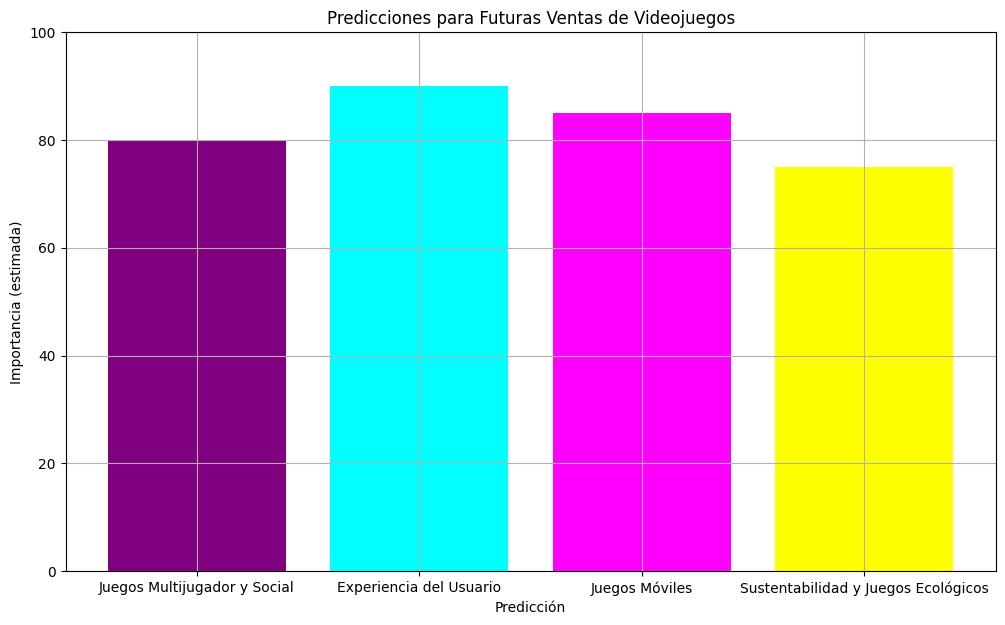

In [141]:
# Datos de predicciones futuras
predictions = ['Juegos Multijugador y Social', 'Experiencia del Usuario', 'Juegos Móviles', 'Sustentabilidad y Juegos Ecológicos']
importance = [80, 90, 85, 75]  # Valores arbitrarios para mostrar importancia

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
plt.bar(predictions, importance, color=['purple', 'cyan', 'magenta', 'yellow'])
plt.xlabel('Predicción')
plt.ylabel('Importancia (estimada)')
plt.title('Predicciones para Futuras Ventas de Videojuegos')
plt.ylim(0, 100)  # Ajustar el límite del eje y para reflejar el rango de importancia
plt.grid(True)
plt.show()



Estas gráficas ayudan a visualizar los análisis y las predicciones discutidas, proporcionando una representación clara y visualmente atractiva de los datos y las conclusiones extraídas del análisis.